In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.metrics import r2_score
from scipy import stats
from scipy.special import boxcox, inv_boxcox
import os
import glob 
import wordcloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
from statsmodels.stats.outliers_influence import variance_inflation_factor 
#from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [2]:
#import all of the data
pd.set_option('display.max_columns', None)
df_review = pd.read_csv('C:/Users/teren/Documents/GitHub/Steam_Review_Analysis/Data/steam_reviews.csv')
df_desc = pd.read_csv('C:/Users/teren/Documents/GitHub/Steam_Review_Analysis/Data/steam_games_description.csv')

In [3]:
df_review.describe()

funny        helpful    hour_played
count  4.348910e+05  434891.000000  434891.000000
mean   5.333024e+05       1.004114     364.130773
std    4.785640e+07      59.462935     545.961198
min    0.000000e+00       0.000000       0.000000
25%    0.000000e+00       0.000000      62.000000
50%    0.000000e+00       0.000000     190.000000
75%    0.000000e+00       0.000000     450.000000
max    4.294967e+09   28171.000000   31962.000000

In [4]:
df_desc.loc[df_desc['Name'] == 'Euro Truck Simulator']

Unnamed: 0    id                  Name   RawgID  \
5298        5298  5299  Euro Truck Simulator  20020.0   

                                               SteamURL  Metacritic  \
5298  https://store.steampowered.com/app/232010/?snr...         NaN   

                 Genres  Indie   Presence   Platform Graphics         Storage  \
5298  Indie, Simulation    1.0  1006869.0  PC, macOS  256 MB   2 GB HD space    

         Memory                                   RatingsBreakdown  \
5298  1 GB RAM   recommended: 38, meh: 15, skip: 8, exceptional: 5   

     ReleaseDate  Soundtrack     Franchise OriginalCost DiscountedCost  \
5298    8/6/2008         0.0  SCS Software       $4.99             NaN   

                                     Players  Controller  \
5298  singleplayer, multiplayer, online coop         1.0   

                                              Languages ESRB  Achievements  \
5298  English, German, French, Italian, Portuguese, ...  NaN           0.0   

      Publisher                                        Description  \
5298        NaN  The original Euro Truck Simulator - the game w...   

                                                   Tags  
5298  Simulation, Automobile Sim, Driving, Open Worl...

In [5]:
df_desc.head()

Unnamed: 0  id                              Name   RawgID  \
0           0   1  Counter-Strike: Global Offensive   4291.0   
1           1   2                         Destiny 2     32.0   
2           2   3                            Dota 2  10213.0   
3           3   4          The Elder Scrolls Online  41458.0   
4           4   5                    Sea of Thieves  50781.0   

                                            SteamURL  Metacritic  \
0  https://store.steampowered.com/app/730/?snr=1_...        83.0   
1  https://store.steampowered.com/app/1085660/?sn...        82.0   
2  https://store.steampowered.com/app/570/?snr=1_...        90.0   
3  https://store.steampowered.com/app/306130/?snr...        71.0   
4  https://store.steampowered.com/app/1172620/?sn...        68.0   

                            Genres  Indie   Presence  \
0             Action, Free to Play    0.0  1009588.0   
1  Action, Adventure, Free to Play    0.0  1007425.0   
2                              NaN    0.0  1009306.0   
3       Massively Multiplayer, RPG    0.0  1000781.0   
4                Action, Adventure    0.0   777456.0   

                                            Platform  \
0                        PC, Xbox 360, PlayStation 3   
1  PlayStation 5, Web, Xbox Series X, PC, Xbox On...   
2                                   Linux, macOS, PC   
3                                                 PC   
4                                       PC, Xbox One   

                                            Graphics                 Storage  \
0  Video card must be 256 MB or more and should b...   15 GB available space   
1  NVIDIA® GeForce® GTX 660 2GB or GTX 1050 2GB /...  105 GB available space   
2                         nVidia GeForce 8600/9600GT   15 GB available space   
3  Direct X 11.0 compliant video card with 1GB RA...   85 GB available space   
4          Nvidia GeForce GTX 650 or AMD Radeon 7750   50 GB available space   

     Memory                                   RatingsBreakdown ReleaseDate  \
0  2 GB RAM  recommended: 882, meh: 501, exceptional: 283, ...   8/21/2012   
1  6 GB RAM  recommended: 726, meh: 465, exceptional: 227, ...    9/6/2017   
2  4 GB RAM  meh: 496, recommended: 446, skip: 371, excepti...    7/9/2013   
3  3 GB RAM  recommended: 21, meh: 12, exceptional: 5, skip: 1    4/4/2014   
4  4 GB RAM  recommended: 198, meh: 131, exceptional: 62, s...   3/20/2018   

   Soundtrack                  Franchise  OriginalCost DiscountedCost  \
0         0.0                        NaN  Free to Play            NaN   
1         0.0                    Destiny  Free To Play            NaN   
2         0.0                        NaN  Free to Play            NaN   
3         0.0  The Elder Scrolls, Skyrim       $19.99             NaN   
4         0.0                        NaN       $39.99             NaN   

                               Players  Controller  \
0  multiplayer, pvp, coop, online coop         1.0   
1       multiplayer, coop, online coop         1.0   
2  multiplayer, pvp, coop, online coop         1.0   
3      singleplayer, multiplayer, coop         1.0   
4  multiplayer, pvp, coop, online coop         1.0   

                                           Languages    ESRB  Achievements  \
0  English, Czech, Danish, Dutch, Finnish, French...  Mature         179.0   
1  English, French, Italian, German, Japanese, Ko...    Teen          61.0   
2  English, Bulgarian, Czech, Danish, Dutch, Finn...     NaN           0.0   
3                   English, French, German, Russian     NaN           0.0   
4          English, French, Italian, German, Russian    Teen         308.0   

   Publisher                                        Description  \
0        NaN  Counter-Strike is a multiplayer phenomenon in ...   
1        NaN  Destiny 2 is an online multiplayer first-perso...   
2        NaN  What used to be an unofficial modded map for t...   
3        NaN  Includes The Elder Scrolls Online base game an...   
4        NaN  Sea

In [6]:
df_desc.describe()

Unnamed: 0            id         RawgID   Metacritic         Indie  \
count  30250.000000  30250.000000   30156.000000  3356.000000  30045.000000   
mean   15124.500000  15125.500000  107361.317084    72.924911      0.740722   
std     8732.567158   8732.567158  135657.577486    10.805296      0.438246   
min        0.000000      1.000000       2.000000    20.000000      0.000000   
25%     7562.250000   7563.250000   16192.750000    67.000000      0.000000   
50%    15124.500000  15125.500000   45524.500000    74.000000      1.000000   
75%    22686.750000  22687.750000  193668.250000    80.000000      1.000000   
max    30249.000000  30250.000000  463726.000000    97.000000      1.000000   

           Presence    Soundtrack    Controller  Achievements  Publisher  
count  3.015600e+04  30045.000000  29976.000000  30156.000000        0.0  
mean   8.822923e+04      0.004760      0.457666     41.047984        NaN  
std    2.447597e+05      0.068826      0.498213    316.231316        NaN  
min    0.000000e+00      0.000000      0.000000      0.000000        NaN  
25%    1.890000e+02      0.000000      0.000000      0.000000        NaN  
50%    3.380000e+02      0.000000      0.000000      0.000000        NaN  
75%    4.981500e+03      0.000000      1.000000     21.000000        NaN  
max    1.009588e+06      1.000000      1.000000  10979.000000        NaN

In [7]:
df_review['date_posted'].head()

0    2019-02-10
1    2019-02-10
2    2019-02-07
3    2018-06-14
4    2017-06-20
Name: date_posted, dtype: object

In [8]:
#convert date_posted into datetime 
df_review['date_posted'] = pd.to_datetime(df_review['date_posted'], format="%Y/%m/%d")

In [9]:
#Let's see how many titles does the review dataset have. This is a good representation of games that steam players are playing
#df_review.groupby(by = ['title']).count()

In [10]:
#convert the OriginalCost and Presence columns into a number
df_desc['OriginalCost'] = df_desc['OriginalCost'].str.replace('$', '')

In [11]:
df_desc['OriginalCost'] = pd.to_numeric(df_desc['OriginalCost'], errors = 'coerce').fillna(0)
df_desc['Presence'] = pd.to_numeric(df_desc['Presence'], errors = 'coerce').fillna(0)

In [12]:
#now that we successfully merged the data, we can breakdown the Genres, Platform, Ratings Breakdown, and Players fields
#The original fields have the data all grouped together, so we need to break each value into new columns
#Breakdown of Ratings as well. 
df_desc_Genres = df_desc['Genres'].str.get_dummies(sep=', ').add_prefix('Genre-')
df_desc_Platform = df_desc['Platform'].str.get_dummies(sep=', ').add_prefix('Platform-')
df_desc_Players = df_desc['Players'].str.get_dummies(sep=', ').add_prefix('Players-')
# df_full_Ratings = pd.DataFrame(df_full['RatingsBreakdown'].row.str.split(' ',2).tolist(),columns=['recommended','meh','skip', 'exceptional'])

In [13]:
#Let's also breakdown the Metacritic users scoresto correlate the steam review score data
x = df_desc['RatingsBreakdown'].str.extractall('([\w]*):\s(\d+)').reset_index(level=1, drop=True)

In [14]:
x1 = x.loc[x[0] == 'exceptional'].rename(columns={1 : 'exceptional'}).drop(columns = [0]).astype(int)
x2 = x.loc[x[0] == 'recommended'].rename(columns={1 : 'recommended'}).drop(columns = [0]).astype(int)
x3 = x.loc[x[0] == 'meh'].rename(columns={1 : 'meh'}).drop(columns = [0]).astype(int)
x4 = x.loc[x[0] == 'skip'].rename(columns={1 : 'skip'}).drop(columns = [0]).astype(int)

In [15]:
df_desc_Ratings = pd.concat([x1, x2, x3, x4], axis=1)

In [16]:
df_desc_Ratings.head()

exceptional  recommended    meh   skip
0        283.0        882.0  501.0  185.0
1        227.0        726.0  465.0  106.0
2        228.0        446.0  496.0  371.0
3          5.0         21.0   12.0    1.0
4         62.0        198.0  131.0   39.0

In [17]:
df_desc_Ratings['Total Reviews'] = df_desc_Ratings['exceptional'] + df_desc_Ratings['recommended'] + df_desc_Ratings['meh'] + df_desc_Ratings['skip']
df_desc_Ratings['Recommended'] = df_desc_Ratings['exceptional'] + df_desc_Ratings['recommended']
df_desc_Ratings['Not Recommended'] = df_desc_Ratings['meh'] + df_desc_Ratings['skip']
df_desc_Ratings['Metacritic_Recommended_Rate'] = round(df_desc_Ratings['Recommended'] / df_desc_Ratings['Total Reviews'], 4).fillna(0.001)

In [18]:
df_desc = pd.concat([df_desc, df_desc_Genres, df_desc_Platform, df_desc_Players, df_desc_Ratings], axis=1)

In [19]:
# merge the reviews dataset and the steam games description datasets
df_full = pd.merge(df_review, df_desc, how='left', left_on = ['title'], right_on = ['Name'])

In [20]:
df_full.head()

date_posted  funny  helpful  hour_played  is_early_access_review  \
0  2019-02-10      2        4          578                   False   
1  2019-02-10      0        0          184                   False   
2  2019-02-07      0        0          892                   False   
3  2018-06-14    126     1086          676                   False   
4  2017-06-20     85     2139          612                   False   

  recommendation                                             review  \
0    Recommended  &gt Played as German Reich&gt Declare war on B...   
1    Recommended                                               yes.   
2    Recommended  Very good game although a bit overpriced in my...   
3    Recommended  Out of all the reviews I wrote This one is pro...   
4    Recommended  Disclaimer I survivor main. I play games for f...   

                                         title  Unnamed: 0   id  \
0  Expansion - Hearts of Iron IV: Man the Guns         NaN  NaN   
1  Expansion - Hearts of Iron IV: Man the Guns         NaN  NaN   
2  Expansion - Hearts of Iron IV: Man the Guns         NaN  NaN   
3                             Dead by Daylight         8.0  9.0   
4                             Dead by Daylight         8.0  9.0   

               Name  RawgID  \
0               NaN     NaN   
1               NaN     NaN   
2               NaN     NaN   
3  Dead by Daylight  9966.0   
4  Dead by Daylight  9966.0   

                                            SteamURL  Metacritic  Genres  \
0                                                NaN         NaN     NaN   
1                                                NaN         NaN     NaN   
2                                                NaN         NaN     NaN   
3  https://store.steampowered.com/app/381210/?snr...        72.0  Action   
4  https://store.steampowered.com/app/381210/?snr...        72.0  Action   

   Indie   Presence                                      Platform  \
0    NaN        NaN                                           NaN   
1    NaN        NaN                                           NaN   
2    NaN        NaN                                           NaN   
3    0.0  1001152.0  PC, Nintendo Switch, Xbox One, PlayStation 4   
4    0.0  1001152.0  PC, Nintendo Switch, Xbox One, PlayStation 4   

                                            Graphics                Storage  \
0                                                NaN                    NaN   
1                                                NaN                    NaN   
2                                                NaN                    NaN   
3  DX11 Compatible GeForce GTX 460 1GB or AMD HD ...  25 GB available space   
4  DX11 Compatible GeForce GTX 460 1GB or AMD HD ...  25 GB available space   

     Memory                                   RatingsBreakdown ReleaseDate  \
0       NaN                                                NaN         NaN   
1       NaN                                                NaN         NaN   
2       NaN                                                NaN         NaN   
3  8 GB RAM  recommended: 228, meh: 152, skip: 46, exceptio...   6/14/2016   
4  8 GB RAM  recommended: 228, meh: 152, skip: 46, exceptio...   6/14/2016   

   Soundtrack Franchise  OriginalCost DiscountedCost  \
0         NaN       NaN           NaN            NaN   
1         NaN       NaN           NaN            NaN   
2         NaN       NaN           NaN            NaN   
3         0.0       NaN         19.99            NaN   
4         0.0       NaN         19.99            NaN   

                          Players  Controller  \
0                             NaN         NaN   
1                             NaN         NaN   
2                             NaN         NaN   
3  multiplayer, coop, online coop         1.0   
4  multiplayer, coop, online coop         1.0   

                                           Languages    ESRB  Achievements  \
0                                     

In [21]:
#Let's check the merged data and see if any review data is missing description data
df_null = df_full[df_full['Name'].isnull()]
df_null.groupby(by = ['title']).count() 

date_posted   funny  helpful  \
title                                                                         
ACE COMBAT™ 7: SKIES UNKNOWN                            10      10       10   
Expansion - Hearts of Iron IV: Man the Guns              3       3        3   
GOD EATER 3                                             10      10       10   
MONSTER HUNTER: WORLD                                18412   18412    18412   
Overcooked! 2                                           10      10       10   
PLAYERUNKNOWN'S BATTLEGROUNDS                       145685  145685   145685   
RESIDENT EVIL 2 / BIOHAZARD RE:2                      1385    1385     1385   
Rocket League®                                       67907   67907    67907   
Sid Meier's Civilization® VI: Gathering Storm            3       3        3   
Sid Meier’s Civilization® VI                           522     522      522   
Sid Meier’s Civilization® VI: Rise and Fall              3       3        3   
Survivor Pass: Vikendi                                   3       3        3   
Tom Clancy's Rainbow Six® Siege                         10      10       10   
Wallpaper Engine                                       170     170      170   

                                               hour_played  \
title                                                        
ACE COMBAT™ 7: SKIES UNKNOWN                            10   
Expansion - Hearts of Iron IV: Man the Guns              3   
GOD EATER 3                                             10   
MONSTER HUNTER: WORLD                                18412   
Overcooked! 2                                           10   
PLAYERUNKNOWN'S BATTLEGROUNDS                       145685   
RESIDENT EVIL 2 / BIOHAZARD RE:2                      1385   
Rocket League®                                       67907   
Sid Meier's Civilization® VI: Gathering Storm            3   
Sid Meier’s Civilization® VI                           522   
Sid Meier’s Civilization® VI: Rise and Fall              3   
Survivor Pass: Vikendi                                   3   
Tom Clancy's Rainbow Six® Siege                         10   
Wallpaper Engine                                       170   

                                               is_early_access_review  \
title                                                                   
ACE COMBAT™ 7: SKIES UNKNOWN                                       10   
Expansion - Hearts of Iron IV: Man the Guns                         3   
GOD EATER 3                                                        10   
MONSTER HUNTER: WORLD                                           18412   
Overcooked! 2                                                      10   
PLAYERUNKNOWN'S BATTLEGROUNDS                                  145685   
RESIDENT EVIL 2 / BIOHAZARD RE:2                                 1385   
Rocket League®                                                  67907   
Sid Meier's Civilization® VI: Gathering Storm                       3   
Sid Meier’s Civilization® VI                                      522   
Sid Meier’s Civilization® VI: Rise and Fall                         3   
Survivor Pass: Vikendi                                              3   
Tom Clancy's Rainbow Six® Siege                                    10   
Wallpaper Engine                                                  170   

                                               recommendation  review  \
title                                                                   
ACE COMBAT™ 7: SKIES UNKNOWN                               10      10   
Expansion - Hearts of Iron IV: Man the Guns                 3       3   
GOD EATER 3                                                10      10   
MONSTER HUNTER: WORLD                                   18412   18390   
Overcooked! 2                                              10      10   
PLAYERUNKNOWN'S BATTLEGROUNDS                          145685  144846   
RESIDENT EVIL 2 / BIOHAZARD RE:2    

In [22]:
# As we can see 14 titles couldn' be matched. If there is no match, then the description datset must have different names for the same games 
df_desc[df_desc['Name'].str.contains("ACE COMBAT") | df_desc['Name'].str.contains("Hearts of Iron IV") | 
        df_desc['Name'].str.contains("God Eater") | df_desc['Name'].str.contains("Monster Hunter")| df_desc['Name'].str.contains("Overcooked")| 
        df_desc['Name'].str.contains("PlayerUnknown") | df_desc['Name'].str.contains("Resident Evil Revelations 2") | df_desc['Name'].str.contains("Rocket League") |
        df_desc['Name'].str.contains("Sid Meier's Civilization")| df_desc['Name'].str.contains("Tom Clancy's Rainbow Six Siege") ] 

Unnamed: 0    id                                               Name  \
6              6     7                     Tom Clancy's Rainbow Six Siege   
7              7     8                                      Rocket League   
14            14    15                              Monster Hunter: World   
67            67    68                      PlayerUnknown’s Battlegrounds   
73            73    74                                  Hearts of Iron IV   
112          112   113                                         Overcooked   
128          128   129                         Sid Meier's Civilization V   
263          263   264                        ACE COMBAT 7: SKIES UNKNOWN   
542          542   543                                        God Eater 3   
578          578   579                                         Overcooked   
816          816   817             Sid Meier's Civilization: Beyond Earth   
938          938   939          Sid Meier's Civilization IV: Colonization   
1099        1099  1100  Resident Evil Revelations 2 / Biohazard Revela...   
2074        2074  2075                        Sid Meier's Civilization IV   
2087        2087  2088              Sid Meier's Civilization III Complete   

        RawgID                                           SteamURL  Metacritic  \
6       8488.0  https://store.steampowered.com/app/359550/?snr...        75.0   
7       3272.0  https://store.steampowered.com/app/252950/?snr...        86.0   
14     46889.0  https://store.steampowered.com/app/582010/?snr...        89.0   
67     10142.0  https://store.steampowered.com/app/578080/?snr...        81.0   
73     10715.0  https://store.steampowered.com/app/394360/?snr...        83.0   
112     2115.0  https://store.steampowered.com/app/728880/?snr...        81.0   
128    13633.0  https://store.steampowered.com/app/8930/?snr=1...        90.0   
263    59352.0  https://store.steampowered.com/app/502500/?snr...        79.0   
542   233858.0  https://store.steampowered.com/app/899440/?snr...        72.0   
578     2115.0  https://store.steampowered.com/app/448510/?snr...        81.0   
816    13694.0  https://store.steampowered.com/app/65980/?snr=...        81.0   
938    13777.0  https://store.steampowered.com/app/16810/?snr=...        83.0   
1099   17174.0  https://store.steampowered.com/app/287290/?snr...        72.0   
2074   13780.0  https://store.steampowered.com/app/3900/?snr=1...        94.0   
2087   17380.0  https://store.steampowered.com/app/3910/?snr=1...        90.0   

                                        Genres  Indie   Presence  \
6                                       Action    0.0  1001424.0   
7                Action, Indie, Racing, Sports    1.0  1006678.0   
14                                      Action    0.0  1008752.0   
67    Action, Adventure, Massively Multiplayer    0.0  1008872.0   
73                        Simulation, Strategy    0.0   610603.0   
112                      Action, Casual, Indie    1.0   520749.0   
128                                   Strategy    0.0   856067.0   
263                         Action, Simulation    0.0   298803.0   
542                                     Action    0.0   838085.0   
578          Action, Casual, Indie, Simulation    1.0   520749.0   
816                                   Strategy    0.0   265356.0   
938                                   Strategy    0.0    48269.0   
1099                         Action, Adventure    0.0   386845.0   
2074                                  Strategy    0.0   718788.0   
2087                                  Strategy    0.0    39626.0   

                                               Platform  \
6                           PlayStation 4, PC, Xbox One   
7     Linux, macOS, PC, PlayStation 4, Xbox One, Nin...   
14                          PlayStation 4, PC, Xbox One   
67                          PC, PlayStation 4, Xbox One   
73                                     Linux, PC, macOS   
112        PC, Xbox One, PlayStat

In [23]:
# All games can be matched, except for Hearts of Iron IV , Overcooked 2, Wallpaper Engine, Sid Meier's Civilization games, and Survivor Pass: Vikendi
df_desc['Name'] = df_desc['Name'].replace(['ACE COMBAT 7: SKIES UNKNOWN', 'God Eater 3', 'Monster Hunter: World','PlayerUnknown’s Battlegrounds' ,'Resident Evil Revelations 2 / Biohazard Revelations 2' , 'Rocket League', "Tom Clancy's Rainbow Six Siege"],
                                          ['ACE COMBAT™ 7: SKIES UNKNOWN','GOD EATER 3','MONSTER HUNTER: WORLD', "PLAYERUNKNOWN'S BATTLEGROUNDS",'RESIDENT EVIL 2 / BIOHAZARD RE:2','Rocket League®',"Tom Clancy's Rainbow Six® Siege"])

In [24]:
df_desc

Unnamed: 0     id                              Name   RawgID  \
0               0      1  Counter-Strike: Global Offensive   4291.0   
1               1      2                         Destiny 2     32.0   
2               2      3                            Dota 2  10213.0   
3               3      4          The Elder Scrolls Online  41458.0   
4               4      5                    Sea of Thieves  50781.0   
...           ...    ...                               ...      ...   
30245       24964  24965                Grand Theft Auto V   3498.0   
30246       25642  25643                Grand Theft Auto V   3498.0   
30247       26788  26789                Grand Theft Auto V   3498.0   
30248       28698  28699                Grand Theft Auto V   3498.0   
30249       29571  29572                Grand Theft Auto V   3498.0   

                                                SteamURL  Metacritic  \
0      https://store.steampowered.com/app/730/?snr=1_...        83.0   
1      https://store.steampowered.com/app/1085660/?sn...        82.0   
2      https://store.steampowered.com/app/570/?snr=1_...        90.0   
3      https://store.steampowered.com/app/306130/?snr...        71.0   
4      https://store.steampowered.com/app/1172620/?sn...        68.0   
...                                                  ...         ...   
30245  https://store.steampowered.com/app/1169460/?sn...        97.0   
30246  https://store.steampowered.com/app/1031770/?sn...        97.0   
30247  https://store.steampowered.com/app/1034230/?sn...        97.0   
30248  https://store.steampowered.com/app/1329130/?sn...        97.0   
30249  https://store.steampowered.com/app/1133610/?sn...        97.0   

                                 Genres  Indie   Presence  \
0                  Action, Free to Play    0.0  1009588.0   
1       Action, Adventure, Free to Play    0.0  1007425.0   
2                                   NaN    0.0  1009306.0   
3            Massively Multiplayer, RPG    0.0  1000781.0   
4                     Action, Adventure    0.0   777456.0   
...                                 ...    ...        ...   
30245                       Action, RPG    0.0  1004912.0   
30246             Adventure, Indie, RPG    1.0  1004912.0   
30247                     Casual, Indie    1.0  1004912.0   
30248  Action, Adventure, Casual, Indie    1.0  1004912.0   
30249                        Indie, RPG    1.0  1004912.0   

                                                Platform  \
0                            PC, Xbox 360, PlayStation 3   
1      PlayStation 5, Web, Xbox Series X, PC, Xbox On...   
2                                       Linux, macOS, PC   
3                                                     PC   
4                                           PC, Xbox One   
...                                                  ...   
30245  PlayStation 5, PC, PlayStation 4, PlayStation ...   
30246  PlayStation 5, PC, PlayStation 4, PlayStation ...   
30247  PlayStation 5, PC, PlayStation 4, PlayStation ...   
30248  PlayStation 5, PC, PlayStation 4, PlayStation ...   
30249  PlayStation 5, PC, PlayStation 4, PlayStation ...   

                                                Graphics  \
0      Video card must be 256 MB or more and should b...   
1      NVIDIA® GeForce® GTX 660 2GB or GTX 1050 2GB /...   
2                             nVidia GeForce 8600/9600GT   
3      Direct X 11.0 compliant video card with 1GB RA...   
4              Nvidia GeForce GTX 650 or AMD Radeon 7750   
...                                                  ...   
30245                                                NaN   
30246                                       Любая 512 MB   
30247                 NVIDIA Geforce 8600GT / ATI HD2400   
30248               nVidia GTX 960 or AMD Radeon HD 7950   
30249                                                NaN   

                      Storage       Memory  \
0       15 GB available space     2 GB RAM   
1      105 GB availabl

In [25]:
#remove multiple GTAV titles in the description dataset and extreme OriginalCost datapoints
df_desc.drop(df_desc[(df_desc['Name'] == 'Grand Theft Auto V') & (df_desc['id'] != 11)].index, inplace = True) 
df_desc.drop(df_desc[(df_desc['id'] == 8992)].index, inplace = True) 
df_desc.drop(df_desc[(df_desc['id'] == 13097)].index, inplace = True) 
df_desc.drop(df_desc[(df_desc['id'] == 21376)].index, inplace = True) 
#remove multiple Kenshi titles in the description dataset and extreme OriginalCost datapoints
df_desc.drop(df_desc[(df_desc['id'] == 6135)].index, inplace = True) 
df_desc.drop(df_desc[(df_desc['id'] == 13107)].index, inplace = True) 
#remove multiple Football Manager 2019 titles in the description dataset and extreme OriginalCost datapoints
df_desc.drop(df_desc[(df_desc['id'] == 11808)].index, inplace = True) 
#remove multiple Farming Simulator 2019 titles in the description dataset and extreme OriginalCost datapoints
df_desc.drop(df_desc[(df_desc['id'] == 11333)].index, inplace = True) 

In [26]:
#replace $0 Originalcost of games to the correct prices
df_desc.loc[df_desc['id'] == 103, 'OriginalCost'] = 29.99
df_desc.loc[df_desc['id'] == 189, 'OriginalCost'] = 19.99

In [27]:
#Let's try merging the datasets again.
df_full = pd.merge(df_review, df_desc, how='left', left_on = ['title'], right_on = ['Name'])

In [28]:
#Let's check the merged data and see if any review data is missing description data
df_null = df_full[df_full['Name'].isnull()]
df_null.groupby(by = ['title']).count() 

date_posted  funny  helpful  \
title                                                                        
Expansion - Hearts of Iron IV: Man the Guns              3      3        3   
Overcooked! 2                                           10     10       10   
Sid Meier's Civilization® VI: Gathering Storm            3      3        3   
Sid Meier’s Civilization® VI                           522    522      522   
Sid Meier’s Civilization® VI: Rise and Fall              3      3        3   
Survivor Pass: Vikendi                                   3      3        3   
Wallpaper Engine                                       170    170      170   

                                               hour_played  \
title                                                        
Expansion - Hearts of Iron IV: Man the Guns              3   
Overcooked! 2                                           10   
Sid Meier's Civilization® VI: Gathering Storm            3   
Sid Meier’s Civilization® VI                           522   
Sid Meier’s Civilization® VI: Rise and Fall              3   
Survivor Pass: Vikendi                                   3   
Wallpaper Engine                                       170   

                                               is_early_access_review  \
title                                                                   
Expansion - Hearts of Iron IV: Man the Guns                         3   
Overcooked! 2                                                      10   
Sid Meier's Civilization® VI: Gathering Storm                       3   
Sid Meier’s Civilization® VI                                      522   
Sid Meier’s Civilization® VI: Rise and Fall                         3   
Survivor Pass: Vikendi                                              3   
Wallpaper Engine                                                  170   

                                               recommendation  review  \
title                                                                   
Expansion - Hearts of Iron IV: Man the Guns                 3       3   
Overcooked! 2                                              10      10   
Sid Meier's Civilization® VI: Gathering Storm               3       3   
Sid Meier’s Civilization® VI                              522     522   
Sid Meier’s Civilization® VI: Rise and Fall                 3       3   
Survivor Pass: Vikendi                                      3       3   
Wallpaper Engine                                          170     169   

                                               Unnamed: 0  id  Name  RawgID  \
title                                                                         
Expansion - Hearts of Iron IV: Man the Guns             0   0     0       0   
Overcooked! 2                                           0   0     0       0   
Sid Meier's Civilization® VI: Gathering Storm           0   0     0       0   
Sid Meier’s Civilization® VI                            0   0     0       0   
Sid Meier’s Civilization® VI: Rise and Fall             0   0     0       0   
Survivor Pass: Vikendi                                  0   0     0       0   
Wallpaper Engine                                        0   0     0       0   

                                               SteamURL  Metacritic  Genres  \
title                                                                         
Expansion - Hearts of Iron IV: Man the Guns           0           0       0   
Overcooked! 2                                         0           0       0   
Sid Meier's Civilization® VI: Gathering Storm         0           0       0   
Sid Meier’s Civilization® VI                          0           0       0   
Sid Meier’s Civilization® VI: Rise and Fall           0           0       0   
Survivor Pass: Vikendi                                0           0       0   
Wallpaper Engine                                      0           0       0   

                                             

In [29]:
#Remove the unmatched games.
df_full.drop(df_full[df_full['Name'].isnull()].index, inplace = True)
df_full.describe()

funny        helpful    hour_played     Unnamed: 0  \
count  4.341770e+05  434177.000000  434177.000000  434177.000000   
mean   5.341794e+05       0.948590     364.399881      33.893967   
std    4.789573e+07      58.248411     546.156164      84.492184   
min    0.000000e+00       0.000000       0.000000       6.000000   
25%    0.000000e+00       0.000000      62.000000       9.000000   
50%    0.000000e+00       0.000000     190.000000      10.000000   
75%    0.000000e+00       0.000000     450.000000      67.000000   
max    4.294967e+09   28171.000000   31962.000000   10389.000000   

                  id         RawgID     Metacritic          Indie  \
count  434177.000000  434177.000000  430870.000000  434177.000000   
mean       34.893967    9121.649698      83.350976       0.332961   
std        84.492184    8947.208797       9.443236       0.471273   
min         7.000000     422.000000      69.000000       0.000000   
25%        10.000000    3498.000000      81.000000       0.000000   
50%        11.000000    9671.000000      81.000000       0.000000   
75%        68.000000   10142.000000      89.000000       1.000000   
max     10390.000000  287342.000000      97.000000       1.000000   

           Presence  Soundtrack   OriginalCost     Controller   Achievements  \
count  4.341770e+05    434177.0  434177.000000  434177.000000  434177.000000   
mean   9.983366e+05         0.0      29.460032       0.499262     202.392439   
std    7.068060e+04         0.0       6.360844       0.500000     123.770847   
min    3.620000e+02         0.0       5.990000       0.000000       0.000000   
25%    1.004912e+06         0.0      29.990000       0.000000     113.000000   
50%    1.006678e+06         0.0      29.990000       0.000000     113.000000   
75%    1.008872e+06         0.0      29.990000       1.000000     369.000000   
max    1.008872e+06         0.0      59.990000       1.000000     406.000000   

       Publisher   Genre-Action  Genre-Adventure  Genre-Audio Production  \
count        0.0  434177.000000    434177.000000                434177.0   
mean         NaN       0.984875         0.741142                     0.0   
std          NaN       0.122051         0.438008                     0.0   
min          NaN       0.000000         0.000000                     0.0   
25%          NaN       1.000000         0.000000                     0.0   
50%          NaN       1.000000         1.000000                     0.0   
75%          NaN       1.000000         1.000000                     0.0   
max          NaN       1.000000         1.000000                     0.0   

        Genre-Casual  Genre-Design & Illustration  Genre-Early Access  \
count  434177.000000                     434177.0       434177.000000   
mean        0.000415                          0.0            0.000438   
std         0.020357                          0.0            0.020915   
min         0.000000                          0.0            0.000000   
25%         0.000000                          0.0            0.000000   
50%         0.000000                          0.0            0.000000   
75%         0.000000                          0.0            0.000000   
max         1.000000                          0.0            1.000000   

       Genre-Education  Genre-Free to Play  Genre-Gore    Genre-Indie  \
count         434177.0            434177.0    434177.0  434177.000000   
mean               0.0                 0.0         0.0       0.331839   
std                0.0                 0.0         0.0       0.470874   
min                0.0                 0.0         0.0       0.000000   
25%                0.0                 0.0         0.0       0.000000   
50%                0.0                 0.0         0.0       0.000000   
75%                0.0                 0.0         0.0       1.000000   
max                0.0                 0.0         0.0       1.000000   

       Genre-Massively Multiplayer  Genre-Movie      Genr

In [30]:
df_full.loc[df_full['Genre-Audio Production'].isnull()]

Empty DataFrame
Columns: [date_posted, funny, helpful, hour_played, is_early_access_review, recommendation, review, title, Unnamed: 0, id, Name, RawgID, SteamURL, Metacritic, Genres, Indie, Presence, Platform, Graphics, Storage, Memory, RatingsBreakdown, ReleaseDate, Soundtrack, Franchise, OriginalCost, DiscountedCost, Players, Controller, Languages, ESRB, Achievements, Publisher, Description, Tags, Genre-Action, Genre-Adventure, Genre-Audio Production, Genre-Casual, Genre-Design & Illustration, Genre-Early Access, Genre-Education, Genre-Free to Play, Genre-Gore, Genre-Indie, Genre-Massively Multiplayer, Genre-Movie, Genre-RPG, Genre-Racing, Genre-Simulation, Genre-Software Training, Genre-Sports, Genre-Strategy, Genre-Utilities, Genre-Violent, Platform-3DO, Platform-Android, Platform-Apple II, Platform-Atari 2600, Platform-Atari 5200, Platform-Atari 7800, Platform-Atari 8-bit, Platform-Atari Flashback, Platform-Atari Lynx, Platform-Atari ST, Platform-Classic Macintosh, Platform-Commodore / Amiga, Platform-Dreamcast, Platform-Game Boy, Platform-Game Boy Advance, Platform-Game Boy Color, Platform-Game Gear, Platform-GameCube, Platform-Genesis, Platform-Jaguar, Platform-Linux, Platform-NES, Platform-Neo Geo, Platform-Nintendo 3DS, Platform-Nintendo 64, Platform-Nintendo DS, Platform-Nintendo DSi, Platform-Nintendo Switch, Platform-PC, Platform-PS Vita, Platform-PSP, Platform-PlayStation, Platform-PlayStation 2, Platform-PlayStation 3, Platform-PlayStation 4, Platform-PlayStation 5, Platform-SEGA CD, Platform-SEGA Master System, Platform-SEGA Saturn, Platform-SNES, Platform-Web, Platform-Wii, Platform-Wii U, Platform-Xbox, Platform-Xbox 360, ...]
Index: []

In [31]:
df_full.describe()

funny        helpful    hour_played     Unnamed: 0  \
count  4.341770e+05  434177.000000  434177.000000  434177.000000   
mean   5.341794e+05       0.948590     364.399881      33.893967   
std    4.789573e+07      58.248411     546.156164      84.492184   
min    0.000000e+00       0.000000       0.000000       6.000000   
25%    0.000000e+00       0.000000      62.000000       9.000000   
50%    0.000000e+00       0.000000     190.000000      10.000000   
75%    0.000000e+00       0.000000     450.000000      67.000000   
max    4.294967e+09   28171.000000   31962.000000   10389.000000   

                  id         RawgID     Metacritic          Indie  \
count  434177.000000  434177.000000  430870.000000  434177.000000   
mean       34.893967    9121.649698      83.350976       0.332961   
std        84.492184    8947.208797       9.443236       0.471273   
min         7.000000     422.000000      69.000000       0.000000   
25%        10.000000    3498.000000      81.000000       0.000000   
50%        11.000000    9671.000000      81.000000       0.000000   
75%        68.000000   10142.000000      89.000000       1.000000   
max     10390.000000  287342.000000      97.000000       1.000000   

           Presence  Soundtrack   OriginalCost     Controller   Achievements  \
count  4.341770e+05    434177.0  434177.000000  434177.000000  434177.000000   
mean   9.983366e+05         0.0      29.460032       0.499262     202.392439   
std    7.068060e+04         0.0       6.360844       0.500000     123.770847   
min    3.620000e+02         0.0       5.990000       0.000000       0.000000   
25%    1.004912e+06         0.0      29.990000       0.000000     113.000000   
50%    1.006678e+06         0.0      29.990000       0.000000     113.000000   
75%    1.008872e+06         0.0      29.990000       1.000000     369.000000   
max    1.008872e+06         0.0      59.990000       1.000000     406.000000   

       Publisher   Genre-Action  Genre-Adventure  Genre-Audio Production  \
count        0.0  434177.000000    434177.000000                434177.0   
mean         NaN       0.984875         0.741142                     0.0   
std          NaN       0.122051         0.438008                     0.0   
min          NaN       0.000000         0.000000                     0.0   
25%          NaN       1.000000         0.000000                     0.0   
50%          NaN       1.000000         1.000000                     0.0   
75%          NaN       1.000000         1.000000                     0.0   
max          NaN       1.000000         1.000000                     0.0   

        Genre-Casual  Genre-Design & Illustration  Genre-Early Access  \
count  434177.000000                     434177.0       434177.000000   
mean        0.000415                          0.0            0.000438   
std         0.020357                          0.0            0.020915   
min         0.000000                          0.0            0.000000   
25%         0.000000                          0.0            0.000000   
50%         0.000000                          0.0            0.000000   
75%         0.000000                          0.0            0.000000   
max         1.000000                          0.0            1.000000   

       Genre-Education  Genre-Free to Play  Genre-Gore    Genre-Indie  \
count         434177.0            434177.0    434177.0  434177.000000   
mean               0.0                 0.0         0.0       0.331839   
std                0.0                 0.0         0.0       0.470874   
min                0.0                 0.0         0.0       0.000000   
25%                0.0                 0.0         0.0       0.000000   
50%                0.0                 0.0         0.0       0.000000   
75%                0.0                 0.0         0.0       1.000000   
max                0.0                 0.0         0.0       1.000000   

       Genre-Massively Multiplayer  Genre-Movie      Genr

In [32]:
df_full.groupby(by = ['title']).count() 

date_posted   funny  helpful  \
title                                                                         
ACE COMBAT™ 7: SKIES UNKNOWN                            10      10       10   
ARK: Survival Evolved                                  195     195      195   
ASTRONEER                                             2661    2661     2661   
Battlefleet Gothic: Armada 2                            10      10       10   
Beat Saber                                              10      10       10   
Cold Waters                                             10      10       10   
Dead by Daylight                                     22221   22221    22221   
Divinity: Original Sin 2 - Definitive Edition          190     190      190   
Don't Starve Together                                  165     165      165   
Euro Truck Simulator 2                                 501     501      501   
Factorio                                               170     170      170   
Farming Simulator 19                                    10      10       10   
Football Manager 2019                                   10      10       10   
Foundation                                              10      10       10   
GOD EATER 3                                             10      10       10   
Garry's Mod                                            202     202      202   
Grand Theft Auto V                                   99956   99956    99956   
Human: Fall Flat                                       172     172      172   
Insurgency: Sandstorm                                  220     220      220   
Kenshi                                                  10      10       10   
Left 4 Dead 2                                          221     221      221   
MONSTER HUNTER: WORLD                                18412   18412    18412   
Moonlighter                                             10      10       10   
My Time At Portia                                       10      10       10   
NBA 2K19                                                10      10       10   
PLAYERUNKNOWN'S BATTLEGROUNDS                       145685  145685   145685   
Pathfinder: Kingmaker                                   10      10       10   
RESIDENT EVIL 2 / BIOHAZARD RE:2                      1385    1385     1385   
RimWorld                                               204     204      204   
Rocket League®                                       67907   67907    67907   
Rust                                                 71088   71088    71088   
Slay the Spire                                         260     260      260   
Stardew Valley                                         202     202      202   
Subnautica                                             247     247      247   
Subnautica: Below Zero                                  10      10       10   
Tannenberg                                              10      10       10   
Terraria                                               260     260      260   
The Elder Scrolls V: Skyrim Special Edition           1473    1473     1473   
Tom Clancy's Rainbow Six® Siege                         10      10       10   
Wargroove                                               10      10       10   
Warhammer 40,000: Mechanicus                            10      10       10   

                                               hour_played  \
title                                                        
ACE COMBAT™ 7: SKIES UNKNOWN                            10   
ARK: Survival Evolved                                  195   
ASTRONEER                                             2661   
Battlefleet Gothic: Armada 2                            10   
Beat Saber                                              10   
Cold Waters                                             10   
Dead by Daylight                                     22221   
Divinity: Original Sin 2 - Definitive Edition          190   
Don't Starve Together        

In [33]:
df_full.head()

date_posted  funny  helpful  hour_played  is_early_access_review  \
3  2018-06-14    126     1086          676                   False   
4  2017-06-20     85     2139          612                   False   
5  2016-12-12      4       55         2694                   False   
6  2017-09-17     12      228           48                   False   
7  2018-12-24    295      219           71                   False   

  recommendation                                             review  \
3    Recommended  Out of all the reviews I wrote This one is pro...   
4    Recommended  Disclaimer I survivor main. I play games for f...   
5    Recommended  ENGLISH After playing for more than two years ...   
6    Recommended  Out of all the reviews I wrote This one is pro...   
7    Recommended  I have never been told to kill myself more tha...   

              title  Unnamed: 0   id              Name  RawgID  \
3  Dead by Daylight         8.0  9.0  Dead by Daylight  9966.0   
4  Dead by Daylight         8.0  9.0  Dead by Daylight  9966.0   
5  Dead by Daylight         8.0  9.0  Dead by Daylight  9966.0   
6  Dead by Daylight         8.0  9.0  Dead by Daylight  9966.0   
7  Dead by Daylight         8.0  9.0  Dead by Daylight  9966.0   

                                            SteamURL  Metacritic  Genres  \
3  https://store.steampowered.com/app/381210/?snr...        72.0  Action   
4  https://store.steampowered.com/app/381210/?snr...        72.0  Action   
5  https://store.steampowered.com/app/381210/?snr...        72.0  Action   
6  https://store.steampowered.com/app/381210/?snr...        72.0  Action   
7  https://store.steampowered.com/app/381210/?snr...        72.0  Action   

   Indie   Presence                                      Platform  \
3    0.0  1001152.0  PC, Nintendo Switch, Xbox One, PlayStation 4   
4    0.0  1001152.0  PC, Nintendo Switch, Xbox One, PlayStation 4   
5    0.0  1001152.0  PC, Nintendo Switch, Xbox One, PlayStation 4   
6    0.0  1001152.0  PC, Nintendo Switch, Xbox One, PlayStation 4   
7    0.0  1001152.0  PC, Nintendo Switch, Xbox One, PlayStation 4   

                                            Graphics                Storage  \
3  DX11 Compatible GeForce GTX 460 1GB or AMD HD ...  25 GB available space   
4  DX11 Compatible GeForce GTX 460 1GB or AMD HD ...  25 GB available space   
5  DX11 Compatible GeForce GTX 460 1GB or AMD HD ...  25 GB available space   
6  DX11 Compatible GeForce GTX 460 1GB or AMD HD ...  25 GB available space   
7  DX11 Compatible GeForce GTX 460 1GB or AMD HD ...  25 GB available space   

     Memory                                   RatingsBreakdown ReleaseDate  \
3  8 GB RAM  recommended: 228, meh: 152, skip: 46, exceptio...   6/14/2016   
4  8 GB RAM  recommended: 228, meh: 152, skip: 46, exceptio...   6/14/2016   
5  8 GB RAM  recommended: 228, meh: 152, skip: 46, exceptio...   6/14/2016   
6  8 GB RAM  recommended: 228, meh: 152, skip: 46, exceptio...   6/14/2016   
7  8 GB RAM  recommended: 228, meh: 152, skip: 46, exceptio...   6/14/2016   

   Soundtrack Franchise  OriginalCost DiscountedCost  \
3         0.0       NaN         19.99            NaN   
4         0.0       NaN         19.99            NaN   
5         0.0       NaN         19.99            NaN   
6         0.0       NaN         19.99            NaN   
7         0.0       NaN         19.99            NaN   

                          Players  Controller  \
3  multiplayer, coop, online coop         1.0   
4  multiplayer, coop, online coop         1.0   
5  multiplayer, coop, online coop         1.0   
6  multiplayer, coop, online coop         1.0   
7  multiplayer, coop, online coop         1.0   

                                           Languages    ESRB  Achievements  \
3  English, French, Italian, German, Russian, Tha...  Mature         406.0   
4  English, French, Italian, German, Russian, Tha...  Mature         406.0   
5  English, French, Italian, German, Russian, Tha...  Mature         406.0 

Text(0, 0.5, 'Number of users who found the review funny')

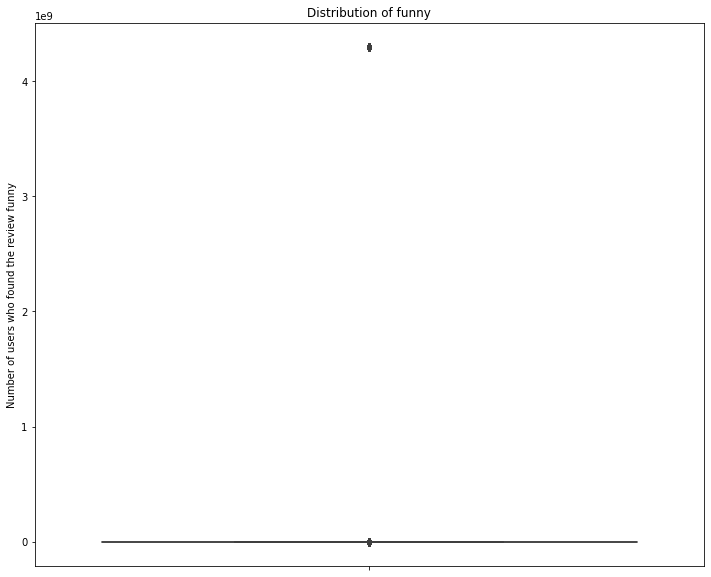

In [34]:
#Now that we merged the data, let's find and remove outliers
#First step is to clean the data. A few outliers can heavily influence the data if not properly checked.
fig, ax = plt.subplots(figsize=(12,10))
sns.boxplot(y='funny', data=df_full)
ax.set_title('Distribution of funny')
ax.set_ylabel('Number of users who found the review funny')

Text(0, 0.5, 'Number of users who found the review helpful')

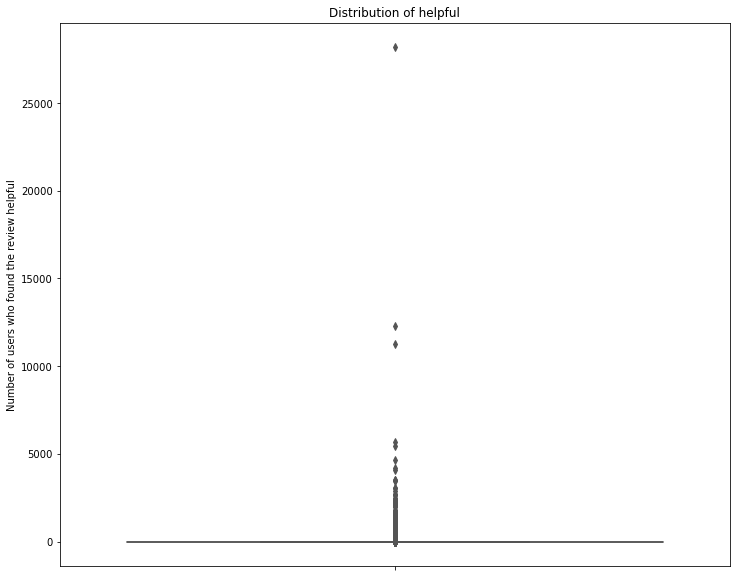

In [35]:
fig, ax = plt.subplots(figsize=(12,10))
sns.boxplot(y='helpful', data=df_full, palette='muted')
ax.set_title('Distribution of helpful')
ax.set_ylabel('Number of users who found the review helpful')

C:\Users\teren\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number of hours each user played')

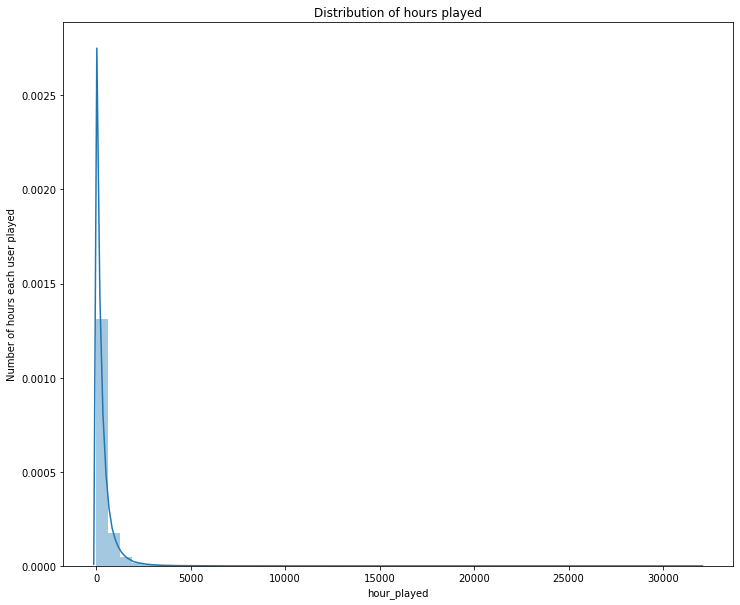

In [36]:
fig, ax = plt.subplots(figsize=(12,10))
sns.distplot(df_full['hour_played'])
ax.set_title('Distribution of hours played')
ax.set_ylabel('Number of hours each user played')

In [37]:
#We observed  a few outliers in the funny boxplot. It's extremely unlikely that one reviewer's comments would have over 4 million responses.
#We need to remove these outliers, since they would impact any statistical analysis.
# calculate summary statistics
#removed_outliers = y.between(y.quantile(0.05), y.quantile(1))
funny_outliers = df_full[(np.abs(stats.zscore(df_full['funny'])) > 3)]
print(funny_outliers)


       date_posted       funny  helpful  hour_played  is_early_access_review  \
46494   2017-05-09  4294967295        1           95                   False   
50161   2016-11-25  4294967295        1          821                   False   
51447   2017-02-20  4294967288        1          243                   False   
51513   2017-08-30  4294967295        1          693                   False   
52445   2017-04-10  4294967295        1         1387                   False   
55860   2015-08-01  4294967295        1           64                   False   
60805   2017-08-05  4294967295        2          186                   False   
117259  2015-06-11  4294967295        2          524                   False   
121434  2017-06-15  4294967295        2          332                   False   
121946  2016-10-09  4294967294        3           53                   False   
122359  2017-06-19  4294967295        3            6                   False   
122780  2017-06-15  4294967294        3 

In [38]:
funny_outliers.count().head(1)

date_posted    54
dtype: int64

In [39]:
df_full.drop(df_full[(np.abs(stats.zscore(df_full['funny'])) > 3)].index, inplace = True)

Text(0, 0.5, 'Number of users who found the review funny')

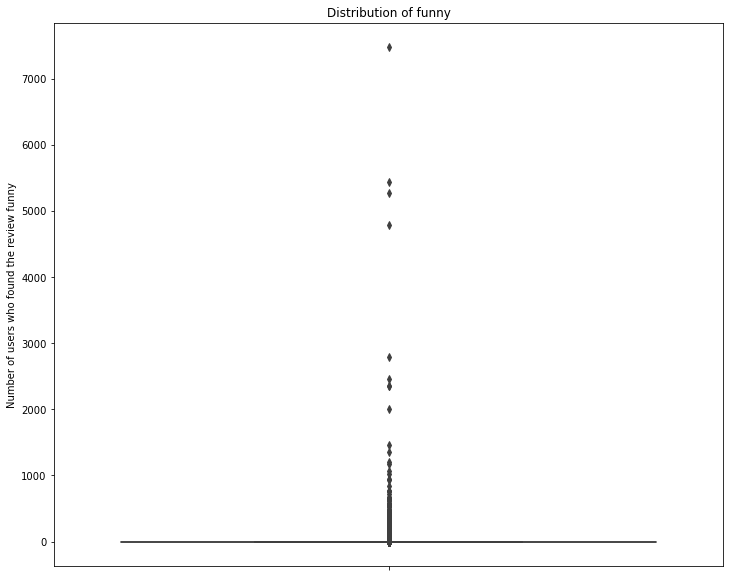

In [40]:
#Let's see how the distirbution of funny reviews changes.
fig, ax = plt.subplots(figsize=(12,10))
sns.boxplot(y='funny', data=df_full)
ax.set_title('Distribution of funny')
ax.set_ylabel('Number of users who found the review funny')

In [41]:
df_full['funny'].describe()

count    434123.000000
mean          0.373106
std          21.027885
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        7472.000000
Name: funny, dtype: float64

Text(0.5, 1.0, 'Total Count of Reviews by Title')

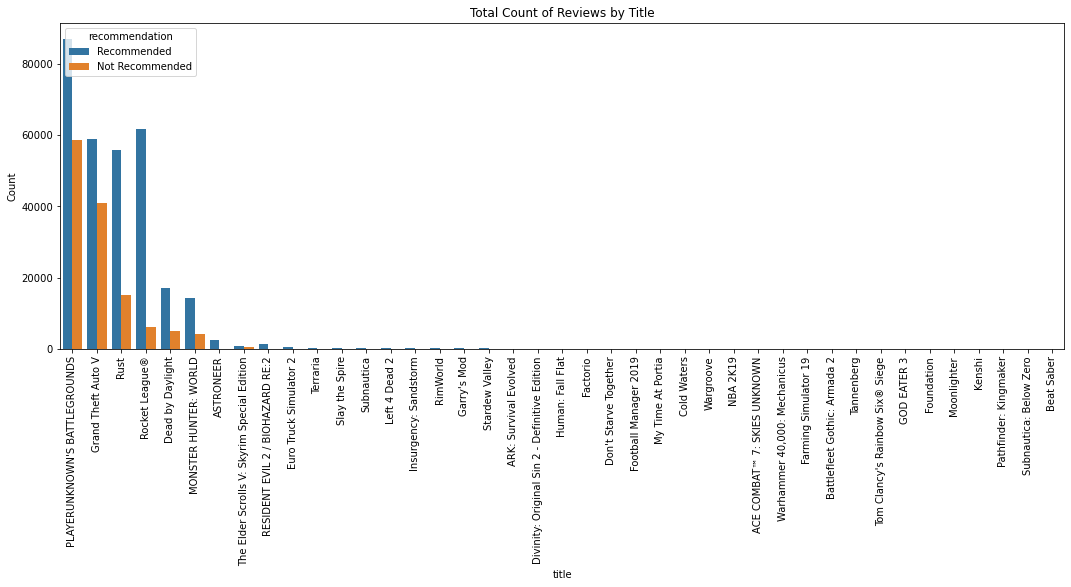

In [42]:
f, ax = plt.subplots(figsize=(18, 6))
sns.countplot(x="title",  data=df_full, hue = 'recommendation', order = df_full["title"].value_counts().index)
plt.xticks(rotation= 90)
plt.xlabel('title')
plt.ylabel('Count')
plt.title("Total Count of Reviews by Title")

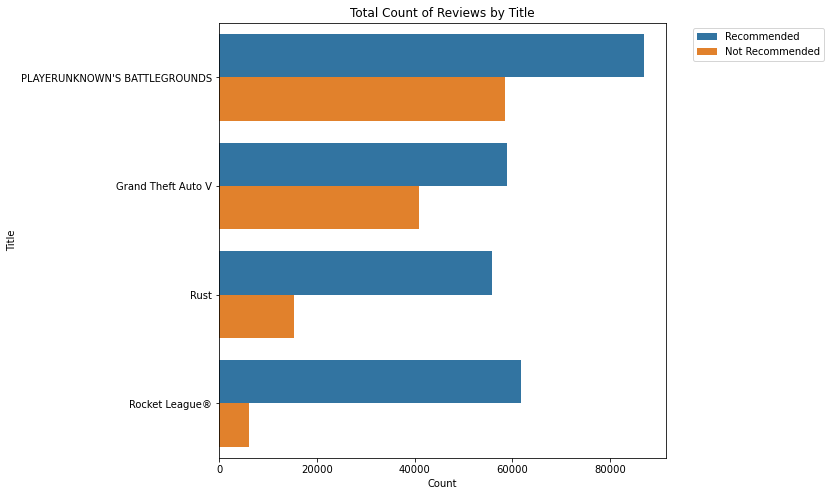

In [43]:
f, ax = plt.subplots(figsize=(8, 8))
sns.countplot(y="title",  data=df_full, hue = 'recommendation', order = df_full["title"].value_counts().iloc[:4].index)
plt.xlabel('Count')
plt.ylabel('Title')
plt.title("Total Count of Reviews by Title")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [44]:
#df_full["title"].value_counts().iloc[:4]

In [147]:
df_full.groupby('title').count().nlargest(5, 'date_posted')

date_posted   funny  helpful  hour_played  \
title                                                                      
PLAYERUNKNOWN'S BATTLEGROUNDS       145674  145674   145674       145674   
Grand Theft Auto V                   99927   99927    99927        99927   
Rust                                 71081   71081    71081        71081   
Rocket League®                       67900   67900    67900        67900   
Dead by Daylight                     22221   22221    22221        22221   

                               is_early_access_review  recommendation  review  \
title                                                                           
PLAYERUNKNOWN'S BATTLEGROUNDS                  145674          145674  144836   
Grand Theft Auto V                              99927           99927   99648   
Rust                                            71081           71081   70900   
Rocket League®                                  67900           67900   67758   
Dead by Daylight                                22221           22221   22178   

                               Unnamed: 0      id    Name  RawgID  SteamURL  \
title                                                                         
PLAYERUNKNOWN'S BATTLEGROUNDS      145674  145674  145674  145674    145674   
Grand Theft Auto V                  99927   99927   99927   99927     99927   
Rust                                71081   71081   71081   71081     71081   
Rocket League®                      67900   67900   67900   67900     67900   
Dead by Daylight                    22221   22221   22221   22221     22221   

                               Metacritic  Genres   Indie  Presence  Platform  \
title                                                                           
PLAYERUNKNOWN'S BATTLEGROUNDS      145674  145674  145674    145674    145674   
Grand Theft Auto V                  99927   99927   99927     99927     99927   
Rust                                71081   71081   71081     71081     71081   
Rocket League®                      67900   67900   67900     67900     67900   
Dead by Daylight                    22221   22221   22221     22221     22221   

                               Graphics  Storage  Memory  RatingsBreakdown  \
title                                                                        
PLAYERUNKNOWN'S BATTLEGROUNDS    145674   145674  145674            145674   
Grand Theft Auto V                99927    99927   99927             99927   
Rust                              71081    71081   71081             71081   
Rocket League®                    67900    67900   67900             67900   
Dead by Daylight                  22221    22221   22221             22221   

                               ReleaseDate  Soundtrack  Franchise  \
title                                                               
PLAYERUNKNOWN'S BATTLEGROUNDS       145674      145674          0   
Grand Theft Auto V                   99927       99927      99927   
Rust                                 71081       71081          0   
Rocket League®                       67900       67900          0   
Dead by Daylight                     22221       22221          0   

                               OriginalCost  DiscountedCost  Players  \
title                                                                  
PLAYERUNKNOWN'S BATTLEGROUNDS        145674               0   145674   
Grand Theft Auto V                    99927               0    99927   
Rust                                  71081               0    71081   
Rocket League®                        67900               0    67900   
Dead by Daylight                      22221               0    22221   

                               Controller  Languages   ESRB  Achievements  \
title                                                                       
PLAYERUNKNOWN'S BATTLEGROUNDS      145674     145674      0        145674   
Grand Theft Auto V                  99927

In [46]:
df_PUBG_R = df_full.loc[(df_full['title'] == "PLAYERUNKNOWN'S BATTLEGROUNDS") & (df_full['recommendation'] == 'Recommended')]
df_PUBG_Not = df_full.loc[(df_full['title'] == "PLAYERUNKNOWN'S BATTLEGROUNDS") & (df_full['recommendation'] == "Not Recommended")]
df_GTA5_R = df_full.loc[(df_full['title'] == "Grand Theft Auto V") & (df_full['recommendation'] == 'Recommended')]
df_GTA5_Not = df_full.loc[(df_full['title'] == "Grand Theft Auto V") & (df_full['recommendation'] == "Not Recommended")]
df_Rust_R = df_full.loc[(df_full['title'] == "Rust") & (df_full['recommendation'] == 'Recommended')]
df_Rust_Not = df_full.loc[(df_full['title'] == "Rust") & (df_full['recommendation'] == "Not Recommended")]
df_RocketLeague_R = df_full.loc[(df_full['title'] == "Rocket League®") & (df_full['recommendation'] == 'Recommended')]
df_RocketLeague_Not = df_full.loc[(df_full['title'] == "Rocket League®") & (df_full['recommendation'] == "Not Recommended")]
df_Dead_R = df_full.loc[(df_full['title'] == "Dead by Daylight") & (df_full['recommendation'] == 'Recommended')]
df_Dead_Not = df_full.loc[(df_full['title'] == "Dead by Daylight") & (df_full['recommendation'] == "Not Recommended")]
df_Skyrim_R = df_full.loc[(df_full['title'] == "The Elder Scrolls V: Skyrim Special Edition") & (df_full['recommendation'] == 'Recommended')]
df_Skyrim_Not = df_full.loc[(df_full['title'] == "The Elder Scrolls V: Skyrim Special Edition") & (df_full['recommendation'] == "Not Recommended")]
df_Ark_R = df_full.loc[(df_full['title'] == "ARK: Survival Evolved") & (df_full['recommendation'] == 'Recommended')]
df_Ark_Not = df_full.loc[(df_full['title'] == "ARK: Survival Evolved") & (df_full['recommendation'] == "Not Recommended")]

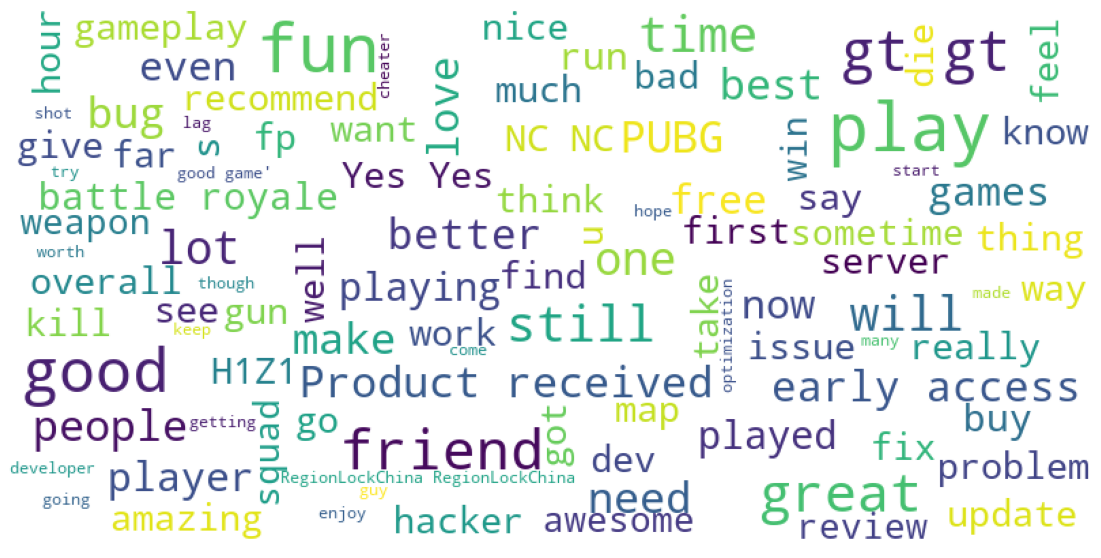

In [47]:
#Keywords mentioned on recommended PUBG reviews
stopwords = ["game"] + list(stopwords)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100, 
                          max_font_size=50, 
                          random_state=42,
                          width=800, height=400
                         ).generate(str(df_PUBG_R['review'].tolist()))

print(wordcloud)
fig = plt.figure(figsize=(20, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1800)

#keywords like competitive, performance, and fun are important keywords that could use further investigation. 
#We can look into raw data and see common trends

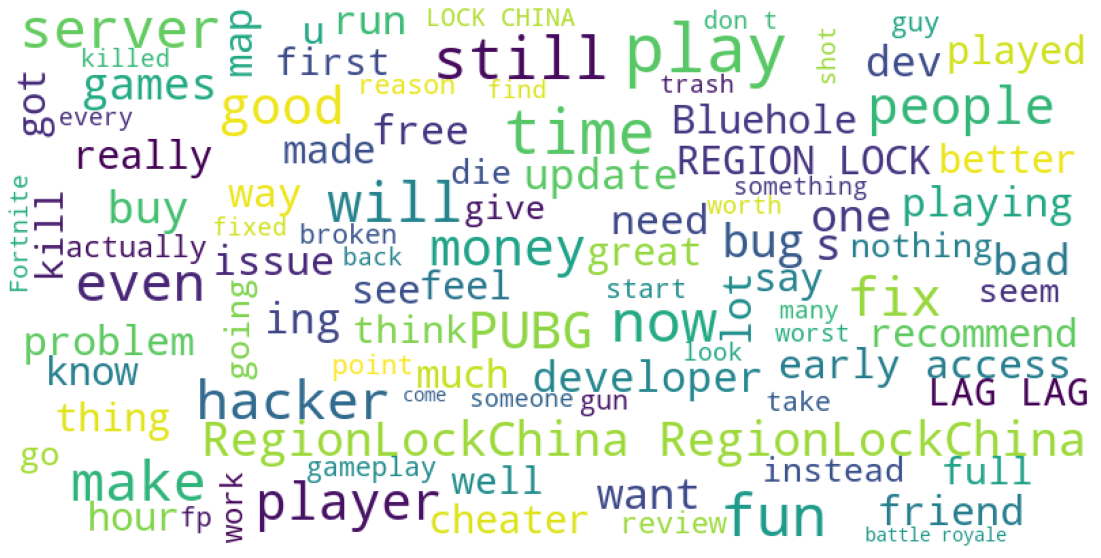

In [48]:
#Keywords mentioned on non-recommended PUBG reviews
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100, 
                          max_font_size=50, 
                          random_state=42,
                          width=800, height=400
                         ).generate(str(df_PUBG_Not['review'].tolist()))

print(wordcloud)
fig = plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1800)
#keywords like cheater/cheating, wasted, trash, and bugs are important keywords that could use further investigation. 
#This shows that PUBG need to look into hacker issues 
#We can look into raw data and see common trends. Can we remove the 'game' keyword?

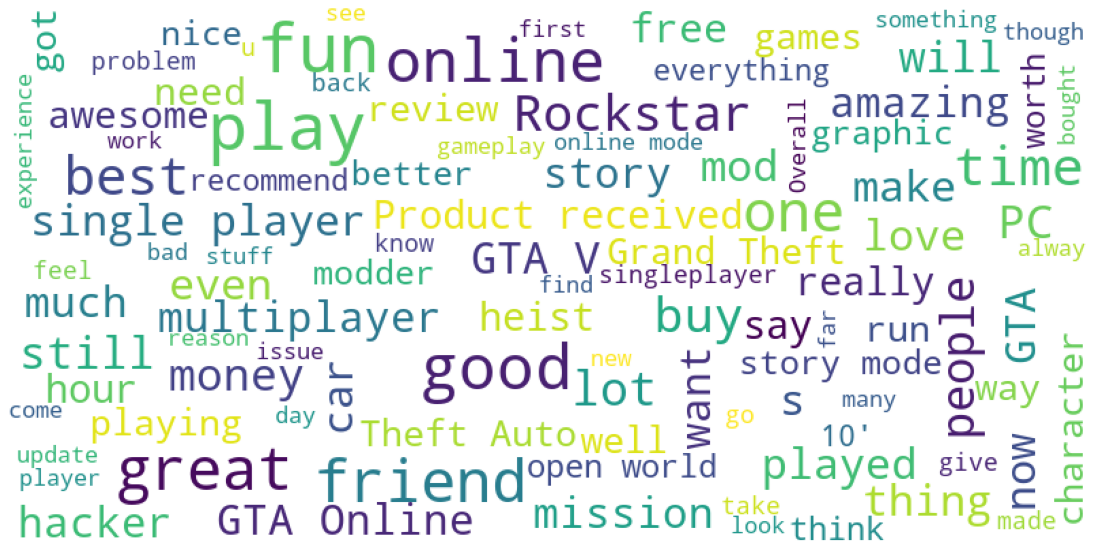

In [49]:
#Keywords mentioned on recommended GTA5 reviews
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100, 
                          max_font_size=50, 
                          random_state=42,
                          width=800, height=400
                         ).generate(str(df_GTA5_R['review'].tolist()))

print(wordcloud)
fig = plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1800)
#keywords like open world, and graphics are important keywords that could use further investigation. 
#We can look into raw data and see common trends

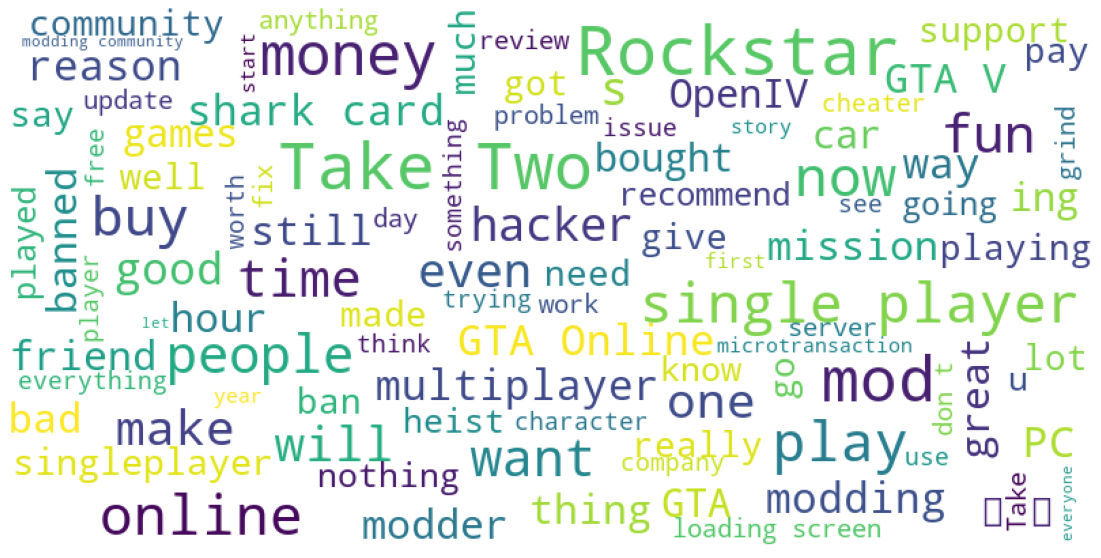

In [50]:
#Keywords mentioned on non-recommended GTA5 reviews
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100, 
                          max_font_size=50, 
                          random_state=42,
                          width=800, height=400
                         ).generate(str(df_GTA5_Not['review'].tolist()))

print(wordcloud)
fig = plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1800)
#keywords like banned, PS4, and PS3 are important keywords that could use further investigation. 
#We can look into raw data and see common trends

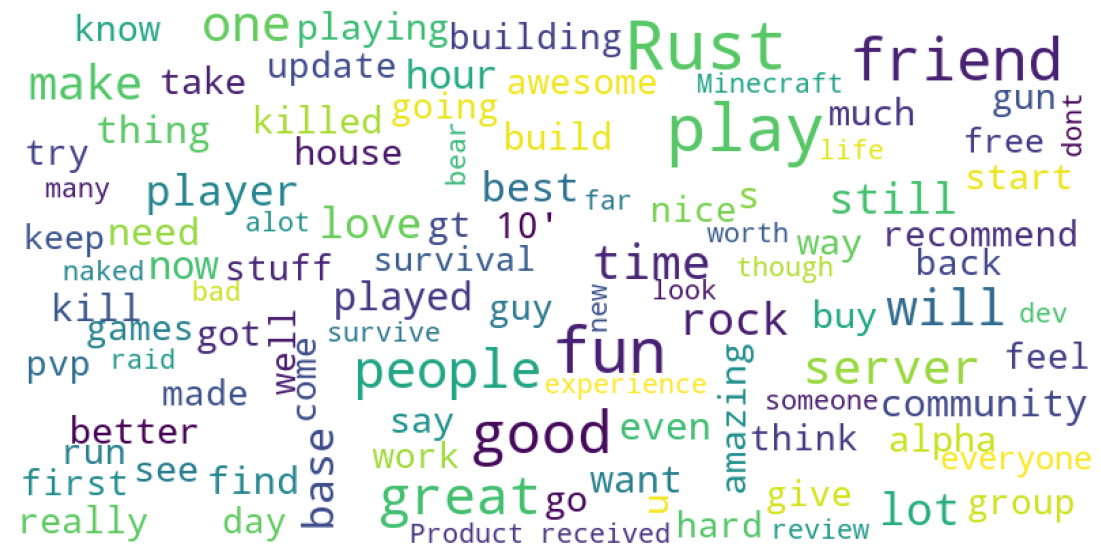

In [51]:
#Keywords mentioned on recommended Rust reviews
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100, 
                          max_font_size=50, 
                          random_state=42,
                          width=800, height=400
                         ).generate(str(df_Rust_R['review'].tolist()))

print(wordcloud)
fig = plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1800)
#keywords like competitive, performance, and fun are important keywords that could use further investigation. 
#We can look into raw data and see common trends

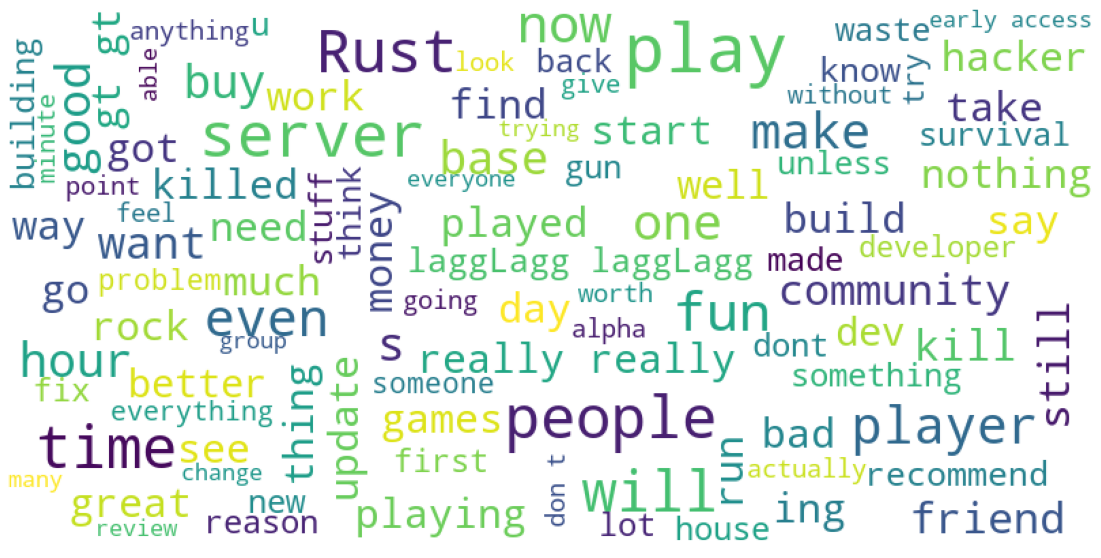

In [52]:
#Keywords mentioned on non-recommended Rust reviews
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100, 
                          max_font_size=50, 
                          random_state=42,
                          width=800, height=400
                         ).generate(str(df_Rust_Not['review'].tolist()))

print(wordcloud)
fig = plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1800)
#keywords like crashes, server are important keywords that could use further investigation. 
#We can look into raw data and see common trends

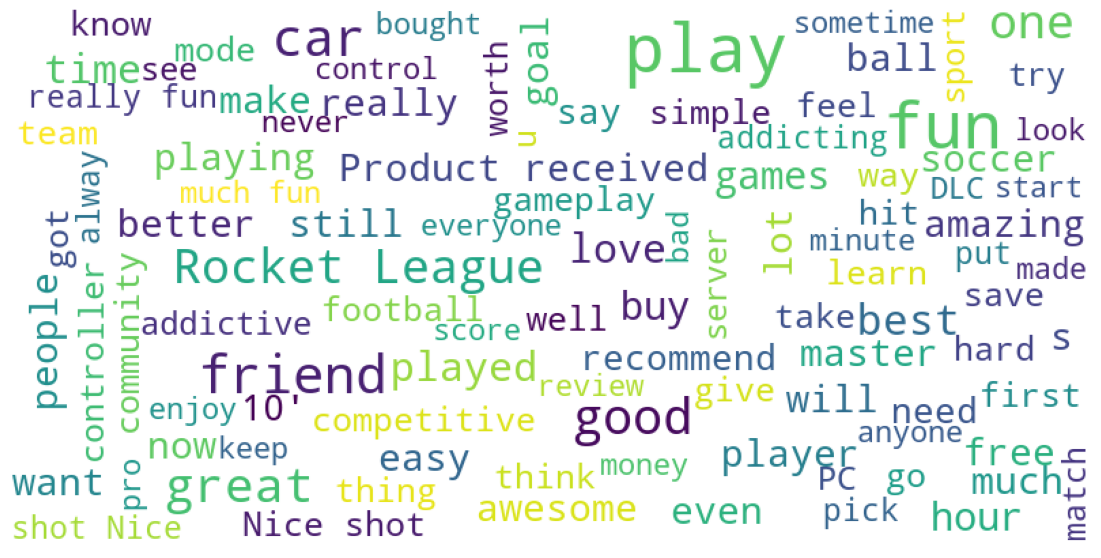

In [53]:
#Keywords mentioned on recommended Rocket League reviews
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100, 
                          max_font_size=50, 
                          random_state=42,
                          width=800, height=400
                         ).generate(str(df_RocketLeague_R['review'].tolist()))

print(wordcloud)
fig = plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1800)
#All keywords are positive feelings towars the game. 
#We can look into raw data and see common trends

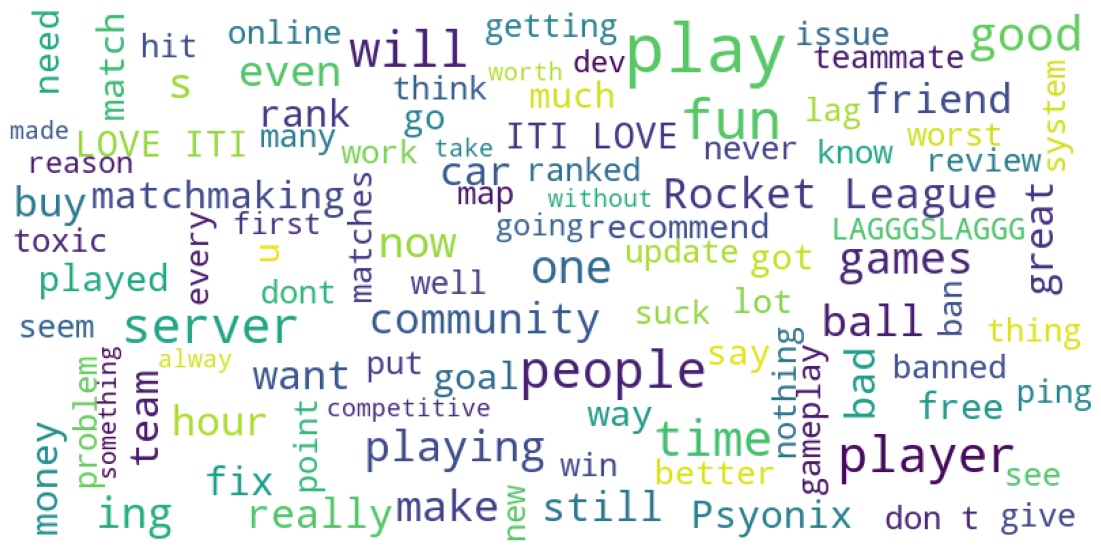

In [54]:
#Keywords mentioned on non-recommended Rocket League reviews
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100, 
                          max_font_size=50, 
                          random_state=42,
                          width=800, height=400
                         ).generate(str(df_RocketLeague_Not['review'].tolist()))

print(wordcloud)
fig = plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1800)
#keywords like matchmatking, server, and connect are important keywords that could use further investigation. 
#We can look into raw data and see common trends

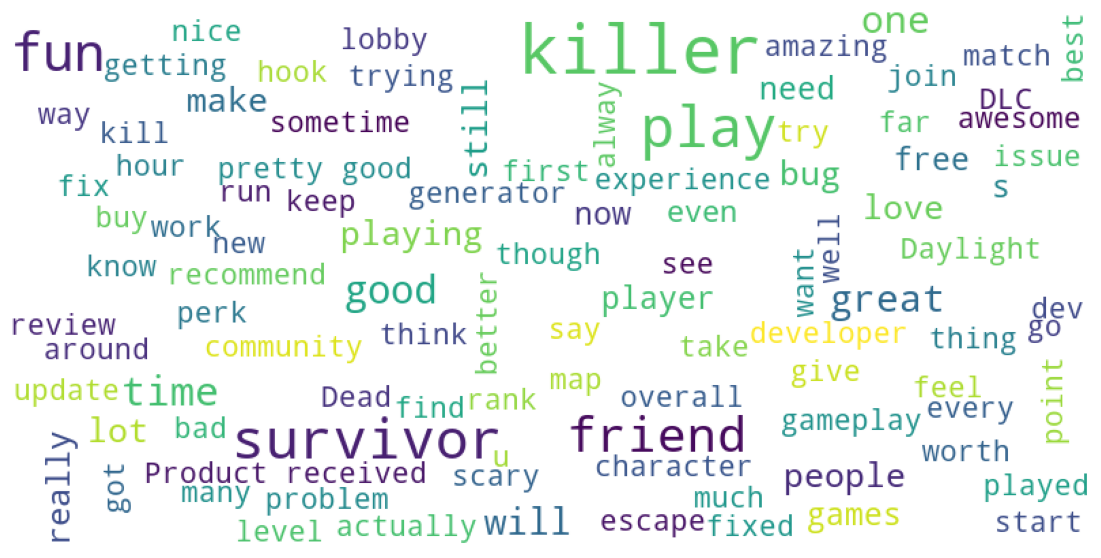

In [55]:
#Keywords mentioned on non-recommended Rust reviews
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100, 
                          max_font_size=50, 
                          random_state=42,
                          width=800, height=400
                         ).generate(str(df_Dead_R['review'].tolist()))

print(wordcloud)
fig = plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1800)
#keywords like crashes, server are important keywords that could use further investigation. 
#We can look into raw data and see common trends

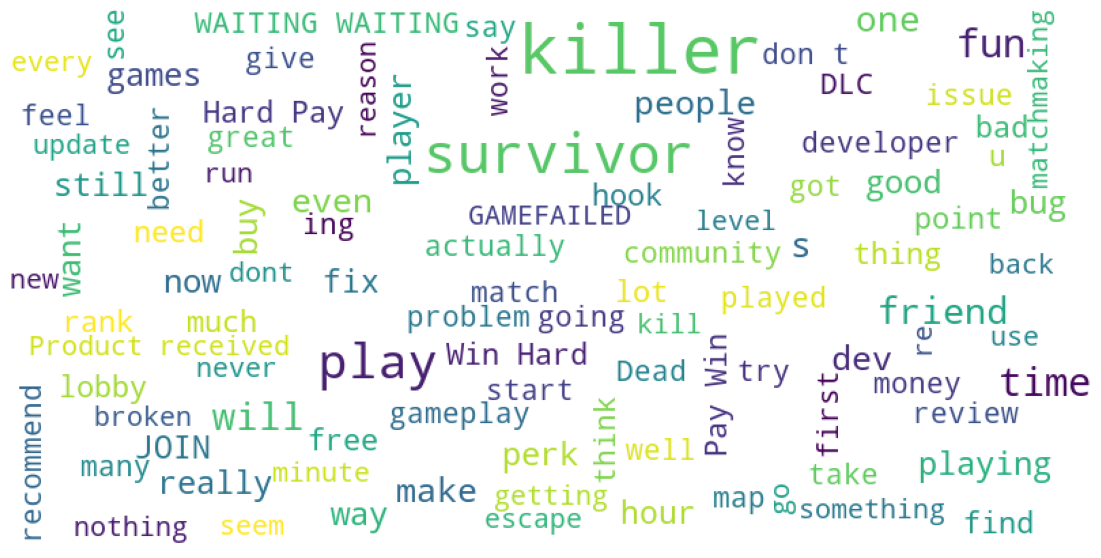

In [56]:
#Keywords mentioned on non-recommended Rust reviews
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100, 
                          max_font_size=50,
                          random_state=42,
                          width=800, height=400
                         ).generate(str(df_Dead_Not['review'].tolist()))

print(wordcloud)
fig = plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1800)
#keywords like crashes, server are important keywords that could use further investigation. 
#We can look into raw data and see common trends

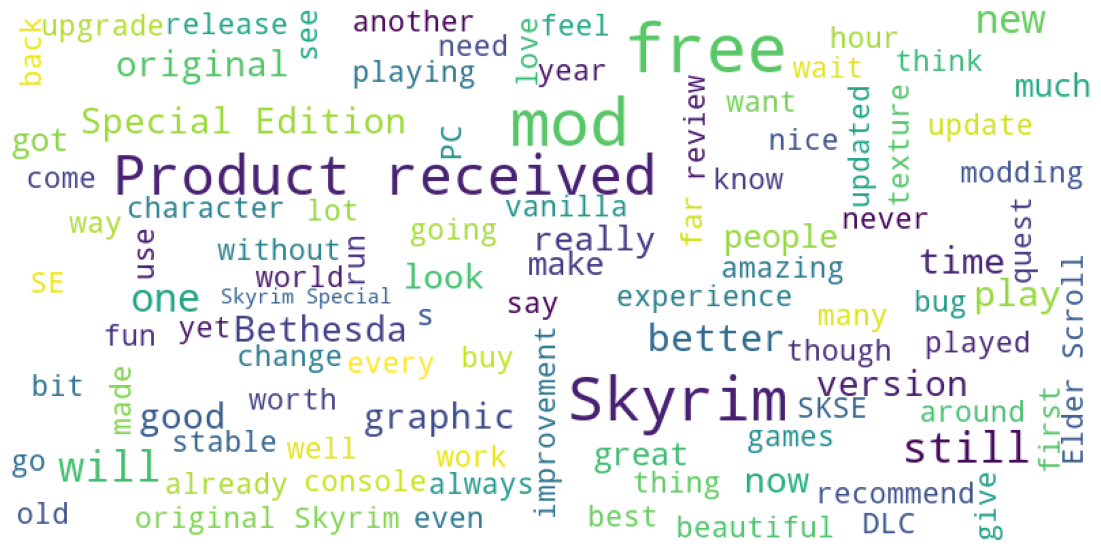

In [57]:
#Keywords mentioned on recommended Skyrim reviews.
#Skyrim has a lot of players who reviewed the game, yet the proportion of recommended is low in comparison to other games.
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100, 
                          max_font_size=50,
                          random_state=42,
                          width=800, height=400
                         ).generate(str(df_Skyrim_R['review'].tolist()))

print(wordcloud)
fig = plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1800)
#keywords like free, houroriginal, and RPG are important keywords that could use further investigation. 
#We can look into raw data and see common trends

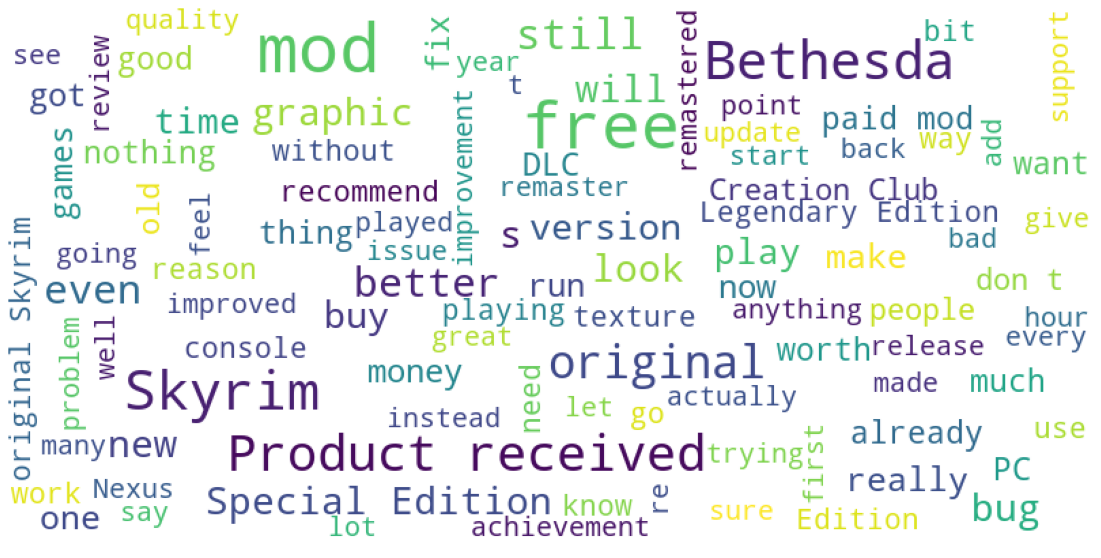

In [58]:
#Keywords mentioned on non-recommended Skyrim reviews
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100, 
                          max_font_size=50,
                          random_state=42,
                          width=800, height=400
                         ).generate(str(df_Skyrim_Not['review'].tolist()))

print(wordcloud)
fig = plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1800)
#keywords paid mods are the most important keywords. 
#Skyrim is a game that had many free fan-made mods before its realease on Steam, and Bethesda decided to create paid mods. In doing so, many fans turned on them and called them 'greedy.'
#We can look into raw data and see common trends

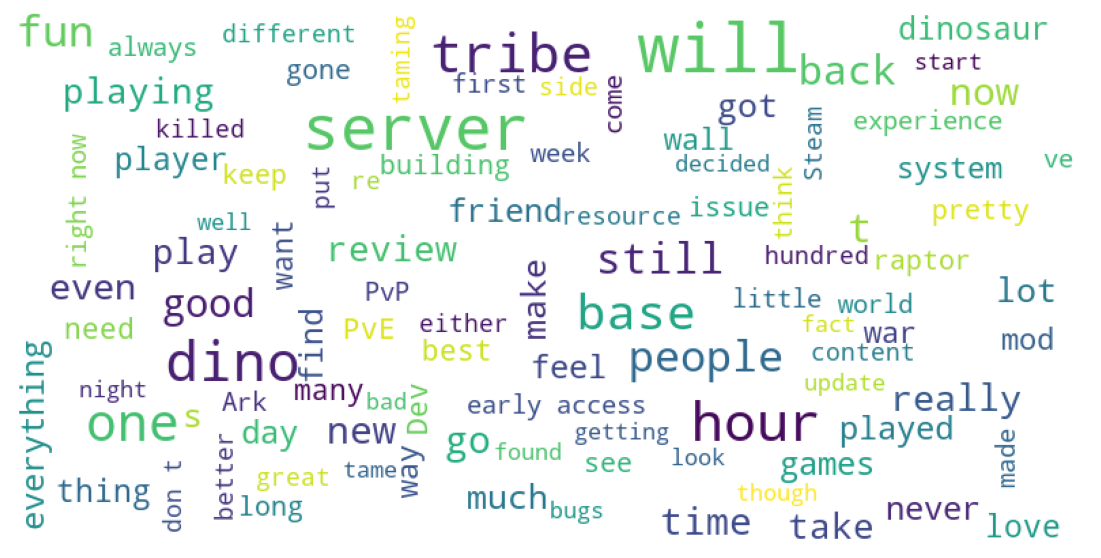

In [59]:
#Keywords mentioned on recommended Ark reviews.
#Ark has one of the lowest recommendation rates. 
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100, 
                          max_font_size=50,
                          random_state=42,
                          width=800, height=400
                         ).generate(str(df_Ark_R['review'].tolist()))

print(wordcloud)
fig = plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1800)
#keywords like free, houroriginal, and RPG are important keywords that could use further investigation. 
#We can look into raw data and see common trends

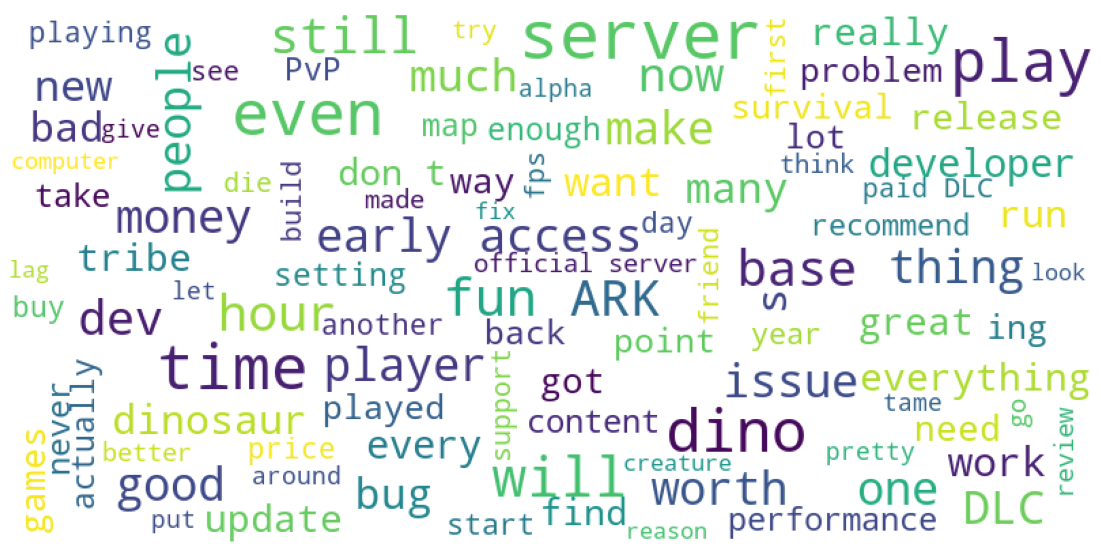

In [60]:
#Keywords mentioned on recommended Ark reviews.
#Ark has one of the lowest recommendation rates. 
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100, 
                          max_font_size=50,
                          random_state=42,
                          width=800, height=400
                         ).generate(str(df_Ark_Not['review'].tolist()))

print(wordcloud)
fig = plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1800)
#keywords like garbage, DLC, optimization are important keywords that could use further investigation. 
#We can look into raw data and see common trends

In [61]:
#We can address what genres are popular on steam now. 
#We should see of all the reviewss, what genres these reviewers are playing. 
#We can sum up the total count of reviews for each genre and compare
Genre_cols = [col for col in df_full.columns if 'Genre' in col]

In [62]:
df_Genre = pd.DataFrame(df_full,columns= Genre_cols)
df_Genre.columns = df_Genre.columns.str.replace("Genre-", "")
df_Genre.head()

Genres  Action  Adventure  Audio Production  Casual  Design & Illustration  \
3  Action     1.0        0.0               0.0     0.0                    0.0   
4  Action     1.0        0.0               0.0     0.0                    0.0   
5  Action     1.0        0.0               0.0     0.0                    0.0   
6  Action     1.0        0.0               0.0     0.0                    0.0   
7  Action     1.0        0.0               0.0     0.0                    0.0   

   Early Access  Education  Free to Play  Gore  Indie  Massively Multiplayer  \
3           0.0        0.0           0.0   0.0    0.0                    0.0   
4           0.0        0.0           0.0   0.0    0.0                    0.0   
5           0.0        0.0           0.0   0.0    0.0                    0.0   
6           0.0        0.0           0.0   0.0    0.0                    0.0   
7           0.0        0.0           0.0   0.0    0.0                    0.0   

   Movie  RPG  Racing  Simulation  Software Training  Sports  Strategy  \
3    0.0  0.0     0.0         0.0                0.0     0.0       0.0   
4    0.0  0.0     0.0         0.0                0.0     0.0       0.0   
5    0.0  0.0     0.0         0.0                0.0     0.0       0.0   
6    0.0  0.0     0.0         0.0                0.0     0.0       0.0   
7    0.0  0.0     0.0         0.0                0.0     0.0       0.0   

   Utilities  Violent  
3        0.0      0.0  
4        0.0      0.0  
5        0.0      0.0  
6        0.0      0.0  
7        0.0      0.0

In [63]:
df_Genre_Summary = df_Genre[['Action', 'Adventure', 'Audio Production', 'Casual', 'Design & Illustration', 
          'Early Access', 'Education', 'Free to Play','Gore','Indie','Massively Multiplayer','Movie','RPG','Racing',
          'Simulation','Software Training','Sports','Strategy','Utilities','Violent']].sum().astype(int)

In [64]:
df_Genre_Summary = df_Genre_Summary.reset_index()

In [65]:
df_Genre_Summary.rename(columns = {"index": "Genre", 0: "Total Reviews by Genre"}, inplace = True)

In [66]:
df_Genre_Summary['Total Reviews'] = df_Genre['Genres'].count()
df_Genre_Summary['Prop of Genres Reviewed'] = round(df_Genre_Summary['Total Reviews by Genre'] / df_Genre_Summary['Total Reviews'], 4)

In [67]:
df_Genre_Summary.sort_values(by=['Prop of Genres Reviewed'], ascending=False)

Genre  Total Reviews by Genre  Total Reviews  \
0                  Action                  427556         433866   
1               Adventure                  321740         433866   
10  Massively Multiplayer                  216960         433866   
9                   Indie                  144063         433866   
12                    RPG                   73431         433866   
13                 Racing                   67900         433866   
16                 Sports                   67910         433866   
14             Simulation                    1534         433866   
17               Strategy                     904         433866   
3                  Casual                     180         433866   
5            Early Access                     190         433866   
18              Utilities                       0         433866   
15      Software Training                       0         433866   
11                  Movie                       0         433866   
4   Design & Illustration                       0         433866   
2        Audio Production                       0         433866   
8                    Gore                       0         433866   
7            Free to Play                       0         433866   
6               Education                       0         433866   
19                Violent                       0         433866   

    Prop of Genres Reviewed  
0                    0.9855  
1                    0.7416  
10                   0.5001  
9                    0.3320  
12                   0.1692  
13                   0.1565  
16                   0.1565  
14                   0.0035  
17                   0.0021  
3                    0.0004  
5                    0.0004  
18                   0.0000  
15                   0.0000  
11                   0.0000  
4                    0.0000  
2                    0.0000  
8                    0.0000  
7                    0.0000  
6                    0.0000  
19                   0.0000

Text(0.5, 1.0, 'Total Count of Reviews by Genre')

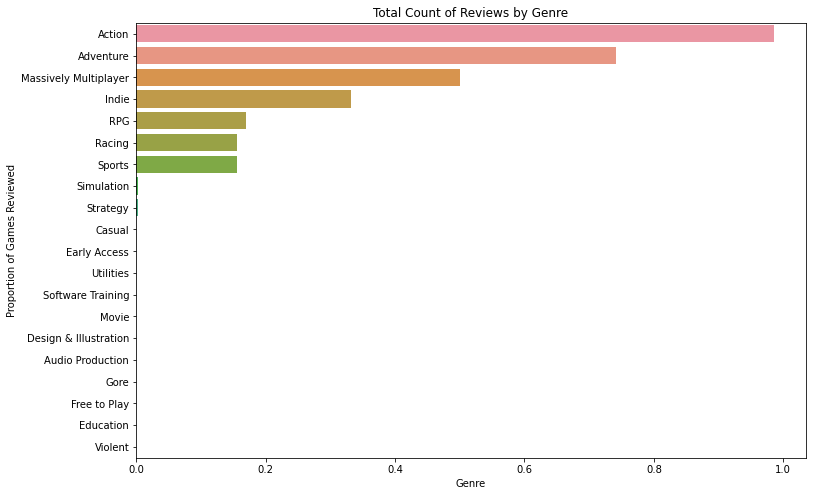

In [68]:
#we can tell that Action, Adventure, Massively Multiplayer and Indie games do very well.
#Of all the steam reviews over 30% of the games reviewed belong to each of these categories. 
#Action - a broad category, so we can't perform any action
#Adventure - This generally means that players are interested in videogames with good stories
#Massively Multiplayer - Lots of steam players like to play games with 
#Indie
f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(y='Genre', x='Prop of Genres Reviewed', data=df_Genre_Summary, order=df_Genre_Summary.sort_values('Prop of Genres Reviewed', ascending = False).Genre)
plt.xlabel('Genre')
plt.ylabel('Proportion of Games Reviewed')
plt.title("Total Count of Reviews by Genre")

In [69]:
df_GenreY = pd.DataFrame(df_full,columns= ['date_posted', 'Genre-Action', 'Genre-Adventure', 'Genre-Massively Multiplayer',
                                          'Genre-Indie', 'Genre-RPG', 'Genre-Racing', 'Genre-Sports'])

In [70]:
df_GenreY['Year_posted'] = df_GenreY['date_posted'].dt.year

In [71]:
df_viz = df_GenreY.groupby(['Year_posted'], as_index=False)['date_posted','Genre-Action', 'Genre-Adventure', 
                         'Genre-Massively Multiplayer', 'Genre-Indie', 'Genre-RPG', 'Genre-Racing', 'Genre-Sports'].sum()

<ipython-input-71-d1377a0089fd>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_viz = df_GenreY.groupby(['Year_posted'], as_index=False)['date_posted','Genre-Action', 'Genre-Adventure',


<AxesSubplot:xlabel='Year_posted'>

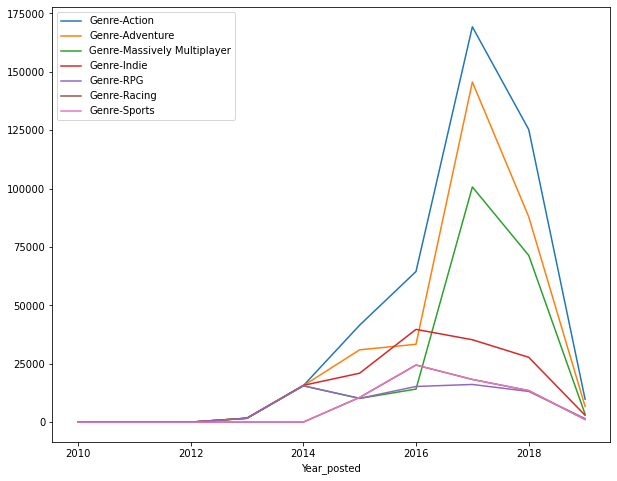

In [72]:
df_viz.plot(x = 'Year_posted', y = ['Genre-Action', 'Genre-Adventure', 'Genre-Massively Multiplayer',
                                          'Genre-Indie', 'Genre-RPG', 'Genre-Racing', 'Genre-Sports'],figsize=(10,8))

In [73]:
#sns.countplot(x=['Genre-Adventure', 'Genre-Casual', 'Genre-Audio Production', 'Genre-Design & Illustration',
#     'Genre-Early Access', 'Genre-Education', 'Genre-Free to Play', 'Genre-Gore', 'Genre-Indie', 
#     'Genre-Massively Multiplayer','Genre-Movie', 'Genre-RPG', 'Genre-Racing', 'Genre-Simulation', 'Genre-Software Training',
#     'Genre-Sports', 'Genre-Strategy','Genre-Utilities', 'Genre-Violent'],  data=df_full)
pd.pivot_table(df_full, columns = ['title', 'Genre-Adventure', 'Genre-Casual', 'Genre-Audio Production', 'Genre-Design & Illustration',
     'Genre-Early Access', 'Genre-Education', 'Genre-Free to Play', 'Genre-Gore', 'Genre-Indie', 
     'Genre-Massively Multiplayer','Genre-Movie', 'Genre-RPG', 'Genre-Racing', 'Genre-Simulation', 'Genre-Software Training',
     'Genre-Sports', 'Genre-Strategy','Genre-Utilities', 'Genre-Violent'], aggfunc = 'sum').plot


In [74]:
df_full.groupby(df_full['date_posted'].map(lambda x: x.year))

In [75]:
#df_full["title"].value_counts().iloc[:4]
df_Genre_Summary.nlargest(7, 'Prop of Genres Reviewed')

Genre  Total Reviews by Genre  Total Reviews  \
0                  Action                  427556         433866   
1               Adventure                  321740         433866   
10  Massively Multiplayer                  216960         433866   
9                   Indie                  144063         433866   
12                    RPG                   73431         433866   
13                 Racing                   67900         433866   
16                 Sports                   67910         433866   

    Prop of Genres Reviewed  
0                    0.9855  
1                    0.7416  
10                   0.5001  
9                    0.3320  
12                   0.1692  
13                   0.1565  
16                   0.1565

In [76]:
#Recommendation is a helpful metric. It signals what games a player should play. 
#We need to make a dataset that shows proportion of recommendation for each game.
g_recommend = df_full.loc[df_full['recommendation'] == 'Recommended'].groupby(['title']).agg({'date_posted': "count"}).rename(columns={'date_posted':'Recommended Reviews'})
g_not_recommend = df_full.loc[df_full['recommendation'] == 'Not Recommended'].groupby(['title']).agg({'date_posted': "count"}).rename(columns={'date_posted':'Not Recommended Reviews'})
g_hours = round(df_full.groupby(['title'])['hour_played'].median().rename('Med Hrs Played'), 2)

In [77]:
#Show proportion of recommendation for each game
# g1 = df_full.groupby(['title', 'recommendation']).agg({'date_posted': "count"})
#g2 = g1.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
#g2.head()

In [78]:
# merge the reviews dataset and the steam games description datasets
g_full = pd.concat([g_recommend, g_not_recommend, g_hours], axis=1)

In [79]:
g_full['Not Recommended Reviews'] = g_full['Not Recommended Reviews'].fillna(0).astype(int)
g_full['Recommended Reviews'] = g_full['Recommended Reviews'].fillna(0).astype(int)

In [80]:
g_full.head()

Recommended Reviews  Not Recommended Reviews  \
ACE COMBAT™ 7: SKIES UNKNOWN                   10                        0   
ARK: Survival Evolved                          33                      162   
ASTRONEER                                    2573                       88   
Battlefleet Gothic: Armada 2                    8                        2   
Beat Saber                                     10                        0   

                              Med Hrs Played  
ACE COMBAT™ 7: SKIES UNKNOWN            22.5  
ARK: Survival Evolved                  240.0  
ASTRONEER                               26.0  
Battlefleet Gothic: Armada 2            61.5  
Beat Saber                              26.5

In [81]:
g_full['Total'] = g_full['Recommended Reviews'] + g_full['Not Recommended Reviews']
g_full['Steam_Recommendation_Rate'] = round(g_full['Recommended Reviews'] / g_full['Total'] , 3).replace(0, 0.001)

In [82]:
g_full = g_full.reset_index()

In [83]:
g_full.rename(columns = {"index": "title"}, inplace = True)

In [84]:
g_full = pd.merge(g_full,df_desc,left_on='title',right_on='Name', how='left')

In [85]:
g_full.sort_values(by=['Total'], ascending=False)

title  Recommended Reviews  \
24                  PLAYERUNKNOWN'S BATTLEGROUNDS                87072   
16                             Grand Theft Auto V                58972   
29                                           Rust                55780   
28                                 Rocket League®                61738   
6                                Dead by Daylight                17116   
21                          MONSTER HUNTER: WORLD                14271   
2                                       ASTRONEER                 2573   
36    The Elder Scrolls V: Skyrim Special Edition                  983   
26               RESIDENT EVIL 2 / BIOHAZARD RE:2                 1377   
9                          Euro Truck Simulator 2                  501   
30                                 Slay the Spire                  258   
35                                       Terraria                  259   
32                                     Subnautica                  247   
20                                  Left 4 Dead 2                  220   
18                          Insurgency: Sandstorm                  207   
27                                       RimWorld                  204   
15                                    Garry's Mod                  196   
31                                 Stardew Valley                  202   
1                           ARK: Survival Evolved                   33   
7   Divinity: Original Sin 2 - Definitive Edition                  173   
17                               Human: Fall Flat                  164   
10                                       Factorio                  170   
8                           Don't Starve Together                  165   
34                                     Tannenberg                   10   
37                Tom Clancy's Rainbow Six® Siege                   10   
38                                      Wargroove                    9   
39                   Warhammer 40,000: Mechanicus                   10   
33                         Subnautica: Below Zero                   10   
0                    ACE COMBAT™ 7: SKIES UNKNOWN                   10   
25                          Pathfinder: Kingmaker                    4   
23                              My Time At Portia                   10   
22                                    Moonlighter                    5   
19                                         Kenshi                   10   
14                                    GOD EATER 3                   10   
13                                     Foundation                    8   
12                          Football Manager 2019                    3   
11                           Farming Simulator 19                    6   
5                                     Cold Waters                   10   
4                                      Beat Saber                   10   
3                    Battlefleet Gothic: Armada 2                    8   
40                                       NBA 2K19                    0   

    Not Recommended Reviews  Med Hrs Played   Total  \
24                    58602           237.0  145674   
16                    40955           175.0   99927   
29                    15301           202.0   71081   
28                     6162           194.0   67900   
6                      5105           118.0   22221   
21                     4141           127.0   18412   
2                        88            26.0    2661   
36                      490            50.0    1473   
26                        8            22.0    1385   
9                         0            92.0     501   
30                        2           107.0     260   
35                        1           276.5     260   
32                        0            62.0     247   
20                        1            88.0     221   
18                       13            30.0     220   
27                        0           131.5     204   


In [86]:
g_full[['title', 'OriginalCost', 'Steam_Recommendation_Rate', 'Total']].sort_values(by=['Total'], ascending = False)

title  OriginalCost  \
24                  PLAYERUNKNOWN'S BATTLEGROUNDS         29.99   
16                             Grand Theft Auto V         29.99   
29                                           Rust         39.99   
28                                 Rocket League®         19.99   
6                                Dead by Daylight         19.99   
21                          MONSTER HUNTER: WORLD         29.99   
2                                       ASTRONEER         29.99   
36    The Elder Scrolls V: Skyrim Special Edition         39.99   
26               RESIDENT EVIL 2 / BIOHAZARD RE:2          5.99   
9                          Euro Truck Simulator 2         19.99   
30                                 Slay the Spire         24.99   
35                                       Terraria          9.99   
32                                     Subnautica         24.99   
20                                  Left 4 Dead 2          9.99   
18                          Insurgency: Sandstorm         29.99   
27                                       RimWorld         34.99   
15                                    Garry's Mod          9.99   
31                                 Stardew Valley         14.99   
1                           ARK: Survival Evolved         49.99   
7   Divinity: Original Sin 2 - Definitive Edition         44.99   
17                               Human: Fall Flat         14.99   
10                                       Factorio         29.99   
8                           Don't Starve Together         14.99   
34                                     Tannenberg         19.99   
37                Tom Clancy's Rainbow Six® Siege         19.99   
38                                      Wargroove         19.99   
39                   Warhammer 40,000: Mechanicus         29.99   
33                         Subnautica: Below Zero         19.99   
0                    ACE COMBAT™ 7: SKIES UNKNOWN         59.99   
25                          Pathfinder: Kingmaker         29.99   
23                              My Time At Portia         29.99   
22                                    Moonlighter         19.99   
19                                         Kenshi         29.99   
14                                    GOD EATER 3         59.99   
13                                     Foundation         29.99   
12                          Football Manager 2019          7.99   
11                           Farming Simulator 19         24.99   
5                                     Cold Waters         39.99   
4                                      Beat Saber         29.99   
3                    Battlefleet Gothic: Armada 2         39.99   
40                                       NBA 2K19         59.99   

    Steam_Recommendation_Rate   Total  
24                      0.598  145674  
16                      0.590   99927  
29                      0.785   71081  
28                      0.909   67900  
6                       0.770   22221  
21                      0.775   18412  
2                       0.967    2661  
36                      0.667    1473  
26                      0.994    1385  
9                       1.000     501  
30                      0.992     260  
35                      0.996     260  
32                      1.000     247  
20                      0.995     221  
18                      0.941     220  
27                      1.000     204  
15                      0.970     202  
31                      1.000     202  
1                       0.169     195  
7                       0.911     190  
17                      0.953     172  
10                      1.000     170  
8                       1.000     165  
34                      1.000      10  
37                      1.000      10  
38                      0.900      10  
39                      1.000      10  
33                      1.000      10  
0                       1.000      10  
25                      0.400

In [87]:
#Remove games that have only 10 reviews in total
g_full.drop(g_full[g_full['Total'] <= 10].index, inplace = True)

<AxesSubplot:>

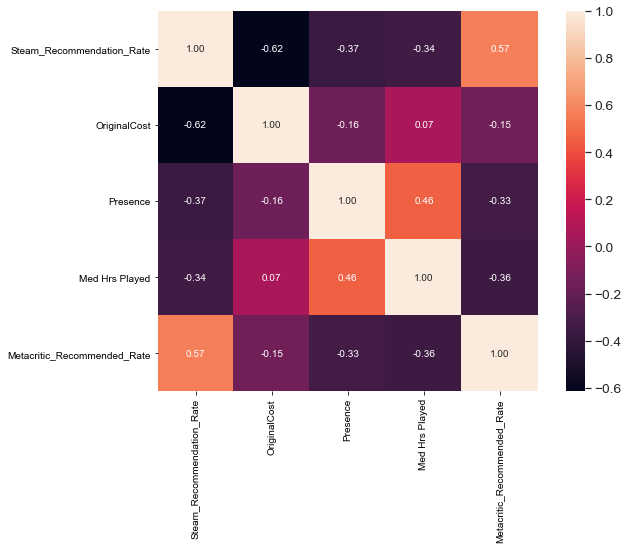

In [88]:
col = ['Steam_Recommendation_Rate', 'OriginalCost', 'Presence', 'Med Hrs Played', 'Metacritic_Recommended_Rate']
f, ax = plt.subplots(figsize=(10, 7))
sns.set(font_scale=1.25)
sns.heatmap(g_full.loc[:,col].corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

In [89]:
# transform Hrs Played & save lambda value 
fitted_Hrs, _ = stats.boxcox(g_full['Med Hrs Played']) 
# transform Prop Recommended & save lambda value 
fitted_Prop, _ = stats.boxcox(g_full['Steam_Recommendation_Rate'])
# transform Metacritic user reviews & save lambda value 
fitted_Meta, _ = stats.boxcox(g_full['Metacritic_Recommended_Rate']) 
# transform OriginalCost & save lambda value 
fitted_Cost, _ = stats.boxcox(g_full['OriginalCost']) 

In [90]:
fitted_Hrs

array([20.80117034,  6.86656153, 14.90830641, 14.06158391, 10.22887151,
       13.21812317, 18.03764171, 24.6934116 , 17.9657773 ,  3.8413932 ,
        7.43116958, 12.93409315, 15.44151878, 20.68105309,  6.24822584,
       15.69980825, 18.85079266, 19.20815431, 14.22303878, 13.18302171,
       10.86946576, 22.19690309,  9.74135273])

In [91]:
fitted_Prop

array([-0.26903311, -0.03155098, -0.16729271, -0.07879612,  0.        ,
        0.        ,  0.        , -0.0288004 , -0.2313975 , -0.04408431,
       -0.05443709, -0.0049662 , -0.16480981, -0.22944934, -0.00595135,
        0.        , -0.08034476, -0.15971206, -0.00791361,  0.        ,
        0.        , -0.00397835, -0.20948141])

C:\Users\teren\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\teren\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


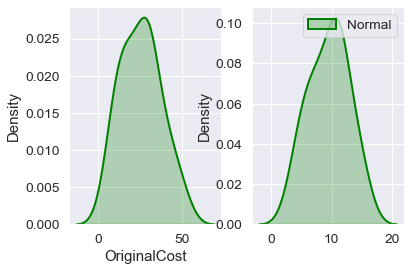

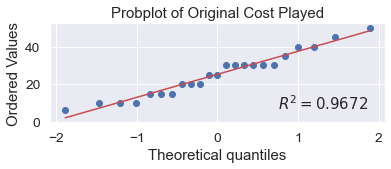

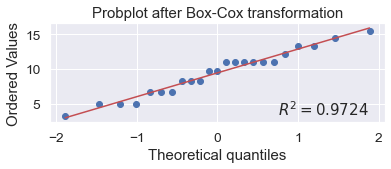

In [92]:
# creating axes to draw plots 
fig, ax = plt.subplots(1, 2) 
  
# plotting the original data(non-normal) and  
# fitted data (normal) 
sns.distplot(g_full['OriginalCost'], hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Non-Normal", color ="green", ax = ax[0]) 
  
sns.distplot(fitted_Cost, hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Normal", color ="green", ax = ax[1]) 

# adding legends to the subplots 
plt.legend(loc = "upper right") 

fig = plt.figure()
ax2 = fig.add_subplot(212)
prob = stats.probplot(g_full['OriginalCost'], dist=stats.norm, plot=ax2, rvalue = True)
ax2.set_title('Probplot of Original Cost Played')
fig = plt.figure()
ax3 = fig.add_subplot(212)
xt, _ = stats.boxcox(g_full['OriginalCost'])
prob = stats.probplot(xt, dist=stats.norm, plot=ax3, rvalue = True)
ax3.set_title('Probplot after Box-Cox transformation')

  
# rescaling the subplots 
fig.set_figheight(4) 
fig.set_figwidth(6) 

C:\Users\teren\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\teren\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


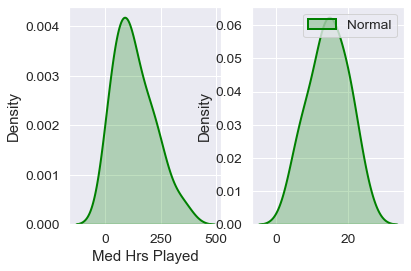

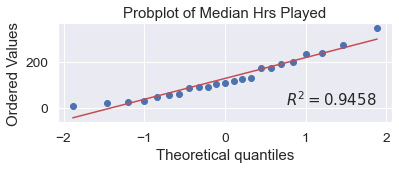

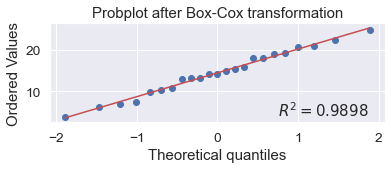

In [93]:
# creating axes to draw plots 
fig, ax = plt.subplots(1, 2) 
  
# plotting the original data(non-normal) and  
# fitted data (normal) 
sns.distplot(g_full['Med Hrs Played'], hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Non-Normal", color ="green", ax = ax[0]) 
  
sns.distplot(fitted_Hrs, hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Normal", color ="green", ax = ax[1]) 

# adding legends to the subplots 
plt.legend(loc = "upper right") 

fig = plt.figure()
ax2 = fig.add_subplot(212)
prob = stats.probplot(g_full['Med Hrs Played'], dist=stats.norm, plot=ax2, rvalue = True)
ax2.set_title('Probplot of Median Hrs Played')
fig = plt.figure()
ax3 = fig.add_subplot(212)
xt, _ = stats.boxcox(g_full['Med Hrs Played'])
prob = stats.probplot(xt, dist=stats.norm, plot=ax3, rvalue = True)
ax3.set_title('Probplot after Box-Cox transformation')

  
# rescaling the subplots 
fig.set_figheight(4) 
fig.set_figwidth(6) 

C:\Users\teren\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\teren\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


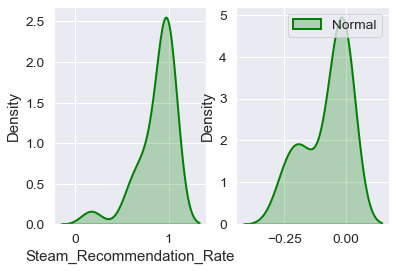

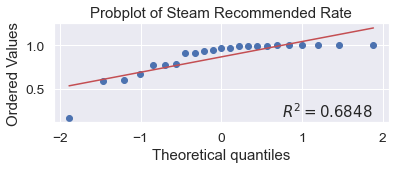

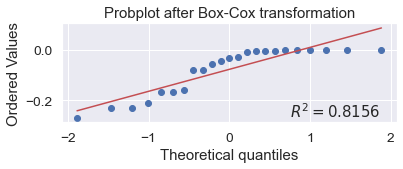

In [94]:
# creating axes to draw plots 
fig, ax = plt.subplots(1, 2) 
  
# plotting the original data(non-normal) and  
# fitted data (normal) 
sns.distplot(g_full['Steam_Recommendation_Rate'], hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Non-Normal", color ="green", ax = ax[0]) 
  
sns.distplot(fitted_Prop, hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Normal", color ="green", ax = ax[1]) 

# adding legends to the subplots 
plt.legend(loc = "upper right") 

fig = plt.figure()
ax2 = fig.add_subplot(212)
prob = stats.probplot(g_full['Steam_Recommendation_Rate'], dist=stats.norm, plot=ax2, rvalue = True)
ax2.set_title('Probplot of Steam Recommended Rate')
fig = plt.figure()
ax3 = fig.add_subplot(212)
xt, _ = stats.boxcox(g_full['Steam_Recommendation_Rate'])
prob = stats.probplot(xt, dist=stats.norm, plot=ax3, rvalue = True)
ax3.set_title('Probplot after Box-Cox transformation')

# rescaling the subplots 
fig.set_figheight(4) 
fig.set_figwidth(6) 

C:\Users\teren\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\teren\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


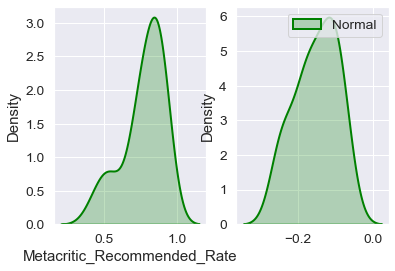

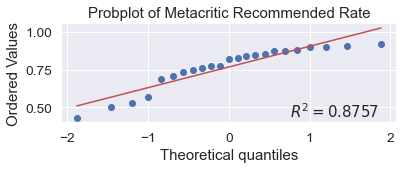

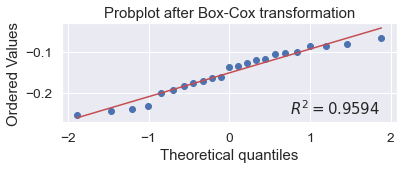

In [95]:
# creating axes to draw plots 
fig, ax = plt.subplots(1, 2) 
  
# plotting the original data(non-normal) and  
# fitted data (normal) 
sns.distplot(g_full['Metacritic_Recommended_Rate'], hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Non-Normal", color ="green", ax = ax[0]) 
  
sns.distplot(fitted_Meta, hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Normal", color ="green", ax = ax[1]) 

# adding legends to the subplots 
plt.legend(loc = "upper right") 

fig = plt.figure()
ax2 = fig.add_subplot(212)
prob = stats.probplot(g_full['Metacritic_Recommended_Rate'], dist=stats.norm, plot=ax2, rvalue = True)
ax2.set_title('Probplot of Metacritic Recommended Rate')

fig = plt.figure()
ax3 = fig.add_subplot(212)
xt, _ = stats.boxcox(g_full['Metacritic_Recommended_Rate'])
prob = stats.probplot(xt, dist=stats.norm, plot=ax3, rvalue = True)
ax3.set_title('Probplot after Box-Cox transformation')

  
# rescaling the subplots 
fig.set_figheight(4) 
fig.set_figwidth(6) 

In [96]:
##Now we determine if there is a correlation between the proportion of steam reviews recommended and the Originalcost for games
## get coeffs of linear fit
##f, ax = plt.subplots(figsize=(8, 5))
#slope, intercept, r_value, p_value, std_err = stats.linregress(g_full['OriginalCost'],g_full['Steam_Recommendation_Rate'])

## use line_kws to set line label for legend
#ax = sns.regplot(x="OriginalCost", y='Steam_Recommendation_Rate', data=g_full,
# line_kws={'label':"y={0:.3f}x+{1:.3f}".format(slope,intercept)})

#Title
#ax.set_title("OriginalCost vs Proportion of Recommended Steam Reviews")

# plot legend
#ax.legend()
#plt.show()

#print("\nr squared:", round(r_value**2, 4))

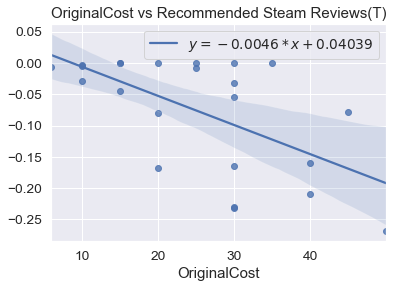


r squared: 0.3642


In [97]:
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(g_full['OriginalCost'],fitted_Prop)
ax = sns.regplot(x=g_full['OriginalCost'], y=fitted_Prop, line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)});
ax.set_title("OriginalCost vs Recommended Steam Reviews(T)")
ax.legend()
plt.show()
print("\nr squared:", round(r_value**2, 4))

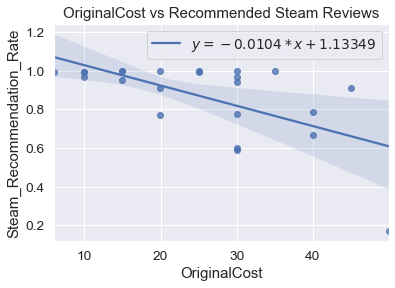


r squared: 0.379


In [98]:
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(g_full['OriginalCost'],g_full['Steam_Recommendation_Rate'])
ax = sns.regplot(x=g_full['OriginalCost'], y=g_full['Steam_Recommendation_Rate'], line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)});
ax.set_title("OriginalCost vs Recommended Steam Reviews")
ax.legend()
plt.show()
print("\nr squared:", round(r_value**2, 4))

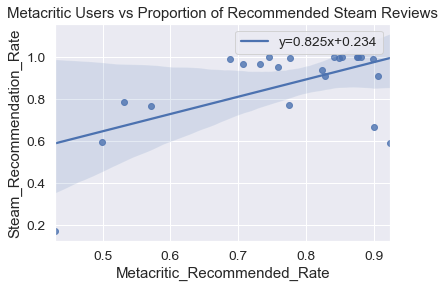


r squared: 0.3249


In [99]:
#Now we determine if there is a correlation between the the proportion of recommended steam reviews vs Metacritic user reviews
# get coeffs of linear fit
#f, ax = plt.subplots(figsize=(8, 5))
slope, intercept, r_value, p_value, std_err = stats.linregress(g_full['Metacritic_Recommended_Rate'],g_full['Steam_Recommendation_Rate'])

#use line_kws to set line label for legend
ax = sns.regplot(x='Metacritic_Recommended_Rate', y='Steam_Recommendation_Rate', data=g_full,
line_kws={'label':"y={0:.3f}x+{1:.3f}".format(slope,intercept)})

#Title
ax.set_title("Metacritic Users vs Proportion of Recommended Steam Reviews")

#plot legend
ax.legend()
plt.show()

print("\nr squared:", round(r_value**2, 4))

In [100]:
# slope, intercept, r_value, p_value, slope_std_error = stats.linregress(g_full['Metacritic_Recommended_Rate'],fitted_Prop)
# ax = sns.regplot(x=g_full['Metacritic_Recommended_Rate'], y=fitted_Prop, line_kws={'label':'$y=%3.5s*x+%3.5s$'%(slope, intercept)});
# ax.set_title("Metascore(T) vs Recommended Steam Reviews(T)")
# ax.legend()
# plt.show()
# print("\nr squared:", round(r_value**2, 4))

In [101]:
# slope, intercept, r_value, p_value, slope_std_error = stats.linregress(g_full['Med Hrs Played'],fitted_Prop)
# ax = sns.regplot(x=g_full['Med Hrs Played'], y=fitted_Prop, line_kws={'label':'$y=%3.6sx+%3.6s$'%(slope, intercept)});
# ax.set_title("Hrs Played(T) vs Recommended Steam Reviews(T)")
# ax.legend()
# plt.show()
# print("\nr squared:", round(r_value**2, 4))

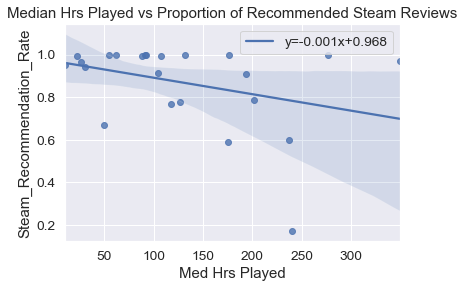


r squared: 0.116


In [102]:
#Now we determine if there is a correlation between the proportion of steam reviews recommended and the Originalcost for games
# get coeffs of linear fit
#f, ax = plt.subplots(figsize=(8, 5))
slope, intercept, r_value, p_value, std_err = stats.linregress(g_full['Med Hrs Played'],g_full['Steam_Recommendation_Rate'])

#use line_kws to set line label for legend
ax = sns.regplot(x='Med Hrs Played', y='Steam_Recommendation_Rate', data=g_full,
line_kws={'label':"y={0:.3f}x+{1:.3f}".format(slope,intercept)})

#Title
ax.set_title("Median Hrs Played vs Proportion of Recommended Steam Reviews")

#plot legend
ax.legend()
plt.show()

print("\nr squared:", round(r_value**2, 4))

In [103]:
#We need to split up the data, so we need to divide the data into x and y
x = df_full[['Genre-Adventure', 'Genre-Casual', 'Genre-Audio Production', 'Genre-Design & Illustration',
         'Genre-Early Access', 'Genre-Education', 'Genre-Free to Play', 'Genre-Gore', 'Genre-Indie', 
         'Genre-Massively Multiplayer','Genre-Movie', 'Genre-RPG', 'Genre-Racing', 'Genre-Simulation', 'Genre-Software Training',
         'Genre-Sports', 'Genre-Strategy','Genre-Utilities', 'Genre-Violent', 'Platform-3DO', 'Platform-Android', 'Platform-Apple II',
         'Platform-Atari 2600', 'Platform-Atari 5200', 'Platform-Atari 7800', 'Platform-Atari 8-bit', 'Platform-Atari Flashback',
         'Platform-Atari Lynx', 'Platform-Atari ST', 'Platform-Classic Macintosh', 'Platform-Commodore / Amiga', 
         'Platform-Dreamcast', 'Platform-Game Boy', 'Platform-Game Boy Advance', 'Platform-Game Boy Color',
         'Platform-Game Gear', 'Platform-GameCube', 'Platform-Genesis', 'Platform-Jaguar', 'Platform-Linux', 'Platform-NES',
         'Platform-Neo Geo', 'Platform-Nintendo 3DS', 'Platform-Nintendo 64', 'Platform-Nintendo DS', 'Platform-Nintendo DSi',
         'Platform-Nintendo Switch', 'Platform-PC', 'Platform-PS Vita', 'Platform-PSP', 'Platform-PlayStation', 
         'Platform-PlayStation 2', 'Platform-PlayStation 3', 'Platform-PlayStation 4', 'Platform-PlayStation 5',
         'Platform-SEGA CD', 'Platform-SEGA Master System', 'Platform-SEGA Saturn', 'Platform-SNES', 'Platform-Web', 'Platform-Wii',
         'Platform-Wii U', 'Platform-Xbox', 'Platform-Xbox 360', 'Platform-Xbox One', 'Platform-Xbox Series X', 'Platform-iOS',
         'Platform-macOS', 'Players-coop', 'Players-multiplayer', 'Players-online coop', 'Players-pvp', 'Players-singleplayer']]


In [104]:
# the independent variables set 
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x.values, i) 
                          for i in range(len(x.columns))] 
pd.set_option('display.max_rows', 100)
vif_data

C:\Users\teren\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\teren\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


feature           VIF
0               Genre-Adventure  9.904614e+02
1                  Genre-Casual  7.522402e+00
2        Genre-Audio Production           NaN
3   Genre-Design & Illustration           NaN
4            Genre-Early Access  7.480215e+00
5               Genre-Education           NaN
6            Genre-Free to Play           NaN
7                    Genre-Gore           NaN
8                   Genre-Indie  1.167888e+03
9   Genre-Massively Multiplayer  1.006567e+03
10                  Genre-Movie           NaN
11                    Genre-RPG  1.930066e+02
12                 Genre-Racing  1.200686e+04
13             Genre-Simulation  1.946561e+01
14      Genre-Software Training           NaN
15                 Genre-Sports  8.534235e+03
16               Genre-Strategy  4.531843e+00
17              Genre-Utilities           NaN
18                Genre-Violent           NaN
19                 Platform-3DO           NaN
20             Platform-Android  1.136677e+01
21            Platform-Apple II           NaN
22          Platform-Atari 2600           NaN
23          Platform-Atari 5200           NaN
24          Platform-Atari 7800           NaN
25         Platform-Atari 8-bit           NaN
26     Platform-Atari Flashback           NaN
27          Platform-Atari Lynx           NaN
28            Platform-Atari ST           NaN
29   Platform-Classic Macintosh           NaN
30   Platform-Commodore / Amiga           NaN
31           Platform-Dreamcast           NaN
32            Platform-Game Boy           NaN
33    Platform-Game Boy Advance           NaN
34      Platform-Game Boy Color           NaN
35           Platform-Game Gear           NaN
36            Platform-GameCube           NaN
37             Platform-Genesis           NaN
38              Platform-Jaguar           NaN
39               Platform-Linux  2.599610e+03
40                 Platform-NES           NaN
41             Platform-Neo Geo           NaN
42        Platform-Nintendo 3DS           inf
43         Platform-Nintendo 64           NaN
44         Platform-Nintendo DS           NaN
45        Platform-Nintendo DSi           NaN
46     Platform-Nintendo Switch  7.568096e+02
47                  Platform-PC  3.842699e+03
48             Platform-PS Vita  1.083111e+02
49                 Platform-PSP           NaN
50         Platform-PlayStation           NaN
51       Platform-PlayStation 2           NaN
52       Platform-PlayStation 3  7.496082e+03
53       Platform-PlayStation 4  2.240982e+03
54       Platform-PlayStation 5  7.889334e+03
55             Platform-SEGA CD           NaN
56  Platform-SEGA Master System           NaN
57         Platform-SEGA Saturn           NaN
58                Platform-SNES           NaN
59                 Platform-Web           NaN
60                 Platform-Wii           NaN
61               Platform-Wii U           inf
62                Platform-Xbox           NaN
63            Platform-Xbox 360  2.370121e+03
64            Platform-Xbox One  2.881005e+01
65       Platform-Xbox Series X           NaN
66                 Platform-iOS  2.755045e+01
67               Platform-macOS  2.293210e+03
68                 Players-coop  7.291060e+01
69          Players-multiplayer  5.068730e+01
70          Players-online coop  5.024592e+02
71                  Players-pvp  1.582356e+03
72         Players-singleplayer  2.634737e+03

In [105]:
vif_data.loc[vif_data['VIF'] >= 10]

feature           VIF
0               Genre-Adventure  9.904614e+02
8                   Genre-Indie  1.167888e+03
9   Genre-Massively Multiplayer  1.006567e+03
11                    Genre-RPG  1.930066e+02
12                 Genre-Racing  1.200686e+04
13             Genre-Simulation  1.946561e+01
15                 Genre-Sports  8.534235e+03
20             Platform-Android  1.136677e+01
39               Platform-Linux  2.599610e+03
42        Platform-Nintendo 3DS           inf
46     Platform-Nintendo Switch  7.568096e+02
47                  Platform-PC  3.842699e+03
48             Platform-PS Vita  1.083111e+02
52       Platform-PlayStation 3  7.496082e+03
53       Platform-PlayStation 4  2.240982e+03
54       Platform-PlayStation 5  7.889334e+03
61               Platform-Wii U           inf
63            Platform-Xbox 360  2.370121e+03
64            Platform-Xbox One  2.881005e+01
66                 Platform-iOS  2.755045e+01
67               Platform-macOS  2.293210e+03
68                 Players-coop  7.291060e+01
69          Players-multiplayer  5.068730e+01
70          Players-online coop  5.024592e+02
71                  Players-pvp  1.582356e+03
72         Players-singleplayer  2.634737e+03

In [106]:
x = df_full[['Genre-Adventure', 'Genre-Indie', 'Genre-Massively Multiplayer','Genre-RPG', 'Genre-Racing', 
             'Genre-Simulation', 'Genre-Sports', 'Platform-Android', 'Platform-Linux',   
             'Platform-Nintendo Switch', 'Platform-PS Vita', 'Platform-PlayStation 3', 'Platform-PlayStation 4', 
             'Platform-PlayStation 5', 'Platform-Xbox 360', 'Platform-Xbox One', 'Platform-iOS',
         'Platform-macOS', 'Players-coop', 'Players-multiplayer', 'Players-online coop', 'Players-pvp', 'Players-singleplayer']]

In [107]:
#We want to remove any false positivies. 
#Any games that have over 90% recommended and less than 10% of recommended should be removed. 
x.sum()

Genre-Adventure                321740.0
Genre-Indie                    144063.0
Genre-Massively Multiplayer    216960.0
Genre-RPG                       73431.0
Genre-Racing                    67900.0
Genre-Simulation                 1534.0
Genre-Sports                    67910.0
Platform-Android                  644.0
Platform-Linux                 141342.0
Platform-Nintendo Switch        92855.0
Platform-PS Vita                 1847.0
Platform-PlayStation 3         101572.0
Platform-PlayStation 4         361444.0
Platform-PlayStation 5          99927.0
Platform-Xbox 360              101793.0
Platform-Xbox One              432525.0
Platform-iOS                     1099.0
Platform-macOS                 141819.0
Players-coop                   430926.0
Players-multiplayer            431605.0
Players-online coop            309369.0
Players-pvp                    216945.0
Players-singleplayer           194727.0
dtype: float64

In [108]:
x = df_full[['Genre-Adventure', 'Genre-Indie', 'Genre-Massively Multiplayer','Genre-RPG', 'Genre-Racing', 
              'Genre-Sports',  'Platform-Linux','Platform-Nintendo Switch', 'Platform-PlayStation 3', 
             'Platform-PlayStation 4', 'Platform-PlayStation 5', 'Platform-Xbox 360', 'Platform-macOS',  
             'Players-online coop', 'Players-pvp', 'Players-singleplayer']]

In [109]:
df_full['recommended_1'] = df_full['recommendation'].replace({'Recommended': 1, "Not Recommended": 0})
y = df_full[['recommended_1']]

In [110]:
#Split data into test and train datasets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [111]:
print("Count of reviews in train: " + str(y_train['recommended_1'].count()) + '\n'
      "Count of reviews in test: " + str(y_test['recommended_1'].count()))

Count of reviews in train: 347298
Count of reviews in test: 86825


Text(0.5, 1.0, 'Total Count of Reviews')

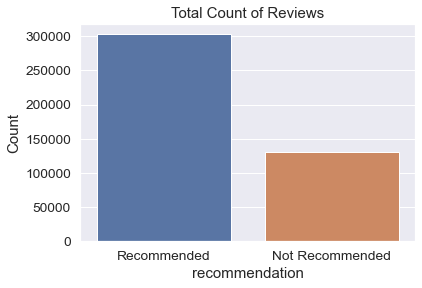

In [112]:
sns.countplot(x="recommendation",  data=df_full)
plt.xlabel('recommendation')
plt.ylabel('Count')
plt.title("Total Count of Reviews")

In [113]:
Recommend_count = int(len(df_full[df_full['recommendation']=="Recommended"])) 
Not_Recommend_count = int(len(df_full[df_full['recommendation']=="Not Recommended"]))
Percentage_Recommend = Recommend_count / (Recommend_count + Not_Recommend_count)
print(Percentage_Recommend * 100)

69.80141572780065


Text(0.5, 1.0, 'Total Count of Reviews')

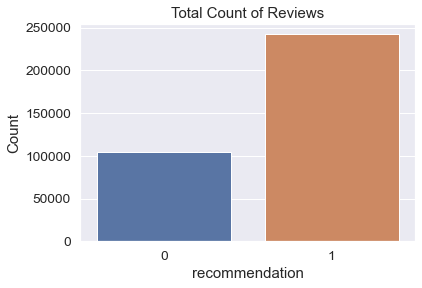

In [114]:
sns.countplot(x="recommended_1",  data=y_train)
plt.xlabel('recommendation')
plt.ylabel('Count')
plt.title("Total Count of Reviews")

In [115]:
x_train.head()

Genre-Adventure  Genre-Indie  Genre-Massively Multiplayer  Genre-RPG  \
245387              1.0          0.0                          1.0        0.0   
311750              1.0          0.0                          1.0        0.0   
18172               0.0          0.0                          0.0        0.0   
240640              1.0          0.0                          1.0        0.0   
361611              1.0          1.0                          1.0        1.0   

        Genre-Racing  Genre-Sports  Platform-Linux  Platform-Nintendo Switch  \
245387           0.0           0.0             0.0                       0.0   
311750           0.0           0.0             0.0                       0.0   
18172            0.0           0.0             0.0                       1.0   
240640           0.0           0.0             0.0                       0.0   
361611           0.0           0.0             1.0                       0.0   

        Platform-PlayStation 3  Platform-PlayStation 4  \
245387                     0.0                     1.0   
311750                     0.0                     1.0   
18172                      0.0                     1.0   
240640                     0.0                     1.0   
361611                     0.0                     0.0   

        Platform-PlayStation 5  Platform-Xbox 360  Platform-macOS  \
245387                     0.0                0.0             0.0   
311750                     0.0                0.0             0.0   
18172                      0.0                0.0             0.0   
240640                     0.0                0.0             0.0   
361611                     0.0                0.0             1.0   

        Players-online coop  Players-pvp  Players-singleplayer  
245387                  1.0          1.0                   0.0  
311750                  1.0          1.0                   0.0  
18172                   1.0          0.0                   0.0  
240640                  1.0          1.0                   0.0  
361611                  1.0          1.0                   0.0

In [116]:
y_train.head()

recommended_1
245387              0
311750              1
18172               1
240640              1
361611              0

In [117]:
df_full.loc[[245387, 311750, 18172], :]

date_posted  funny  helpful  hour_played  is_early_access_review  \
245387  2017-10-26      0        0          408                    True   
311750  2017-11-26      0        0          530                    True   
18172   2016-11-26      0        0         3597                   False   

         recommendation                                             review  \
245387  Not Recommended  Runs like on high end pc's. Dev's hardly makin...   
311750      Recommended                Man gotta love that chicken dinner!   
18172       Recommended      3000 hours in and I still hate this game.9/10   

                                title  Unnamed: 0    id  \
245387  PLAYERUNKNOWN'S BATTLEGROUNDS        67.0  68.0   
311750  PLAYERUNKNOWN'S BATTLEGROUNDS        67.0  68.0   
18172                Dead by Daylight         8.0   9.0   

                                 Name   RawgID  \
245387  PLAYERUNKNOWN'S BATTLEGROUNDS  10142.0   
311750  PLAYERUNKNOWN'S BATTLEGROUNDS  10142.0   
18172                Dead by Daylight   9966.0   

                                                 SteamURL  Metacritic  \
245387  https://store.steampowered.com/app/578080/?snr...        81.0   
311750  https://store.steampowered.com/app/578080/?snr...        81.0   
18172   https://store.steampowered.com/app/381210/?snr...        72.0   

                                          Genres  Indie   Presence  \
245387  Action, Adventure, Massively Multiplayer    0.0  1008872.0   
311750  Action, Adventure, Massively Multiplayer    0.0  1008872.0   
18172                                     Action    0.0  1001152.0   

                                            Platform  \
245387                   PC, PlayStation 4, Xbox One   
311750                   PC, PlayStation 4, Xbox One   
18172   PC, Nintendo Switch, Xbox One, PlayStation 4   

                                                 Graphics  \
245387  NVIDIA GeForce GTX 960 2GB / AMD Radeon R7 370...   
311750  NVIDIA GeForce GTX 960 2GB / AMD Radeon R7 370...   
18172   DX11 Compatible GeForce GTX 460 1GB or AMD HD ...   

                      Storage    Memory  \
245387  30 GB available space  8 GB RAM   
311750  30 GB available space  8 GB RAM   
18172   25 GB available space  8 GB RAM   

                                         RatingsBreakdown ReleaseDate  \
245387  recommended: 439, meh: 422, skip: 114, excepti...  12/20/2017   
311750  recommended: 439, meh: 422, skip: 114, excepti...  12/20/2017   
18172   recommended: 228, meh: 152, skip: 46, exceptio...   6/14/2016   

        Soundtrack Franchise  OriginalCost DiscountedCost  \
245387         0.0       NaN         29.99            NaN   
311750         0.0       NaN         29.99            NaN   
18172          0.0       NaN         19.99            NaN   

                                    Players  Controller  \
245387  multiplayer, pvp, coop, online coop         0.0   
311750  multiplayer, pvp, coop, online coop         0.0   
18172        multiplayer, coop, online coop         1.0   

                                                Languages    ESRB  \
245387  English, Korean, French, German, Arabic, Japan...     NaN   
311750  English, Korean, French, German, Arabic, Japan...     NaN   
18172   English, French, Italian, German, Russian, Tha...  Mature   

        Achievements  Publisher  \
245387         113.0        NaN   
311750         113.0        NaN   
18172          406.0        NaN   

                                              Description  \
245387  PLAYERUNKNOWN’S BATTLEGROUNDS is battle-royale...   
311750  PLAYERUNKNOWN’S BATTLEGROUNDS is battle-royale...   
18172   This asymmetric multiplayer horror game in whi...   

                                                     Tags  Genre-Action  \
245387  Survival, Shooter, Multiplayer, Battle Royale,...           1.0   
311750  Survival, Shooter, Multiplayer, Battle Royale,...           1.0   
18172   Horror, Survival Horror, Multiplayer, Online C...           1.0   


C:\Users\teren\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\teren\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train/Test split results:
LogisticRegression accuracy is 0.700
LogisticRegression log_loss is 0.568
LogisticRegression auc is 0.657


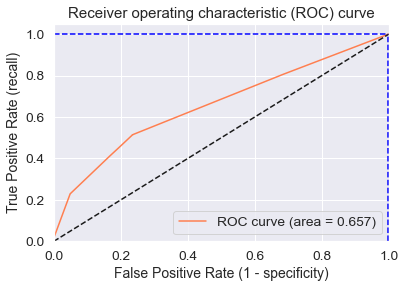

Using a threshold of 0.591 guarantees a sensitivity of 1.000 and a specificity of 0.002, i.e. a false positive rate of 99.85%.


In [118]:
# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
y_pred_proba = logreg.predict_proba(x_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))


idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

[[   40 26056]
 [    7 60722]]


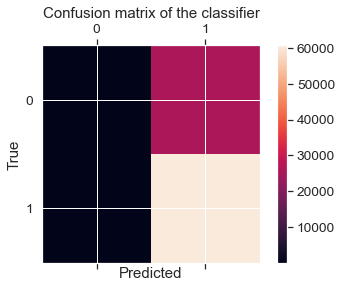

In [119]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

C:\Users\teren\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\teren\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score:  0.697933762935577


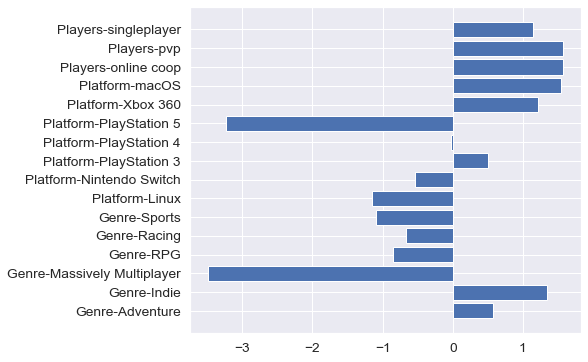

In [120]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define the model
model = LogisticRegression()
# fit the model
model.fit(x_train, y_train)
# get importance
importance = model.coef_[0]
# summarize feature importance
plt.figure(figsize=(7,6))
plt.barh(x_train.columns, importance)
print('Accuracy Score: ', model.score(x_train, y_train))

<ipython-input-121-de409208c718>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


Accuracy Score:  0.07709817385332829


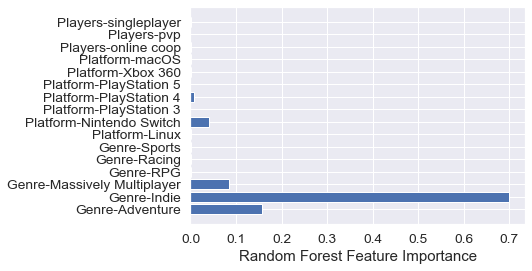

In [121]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf.feature_importances_
plt.barh(x_train.columns, rf.feature_importances_)
plt.xlabel("Random Forest Feature Importance")
print('Accuracy Score: ', rf.score(x_train, y_train))

<ipython-input-122-f90312bbbf20>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


<AxesSubplot:>

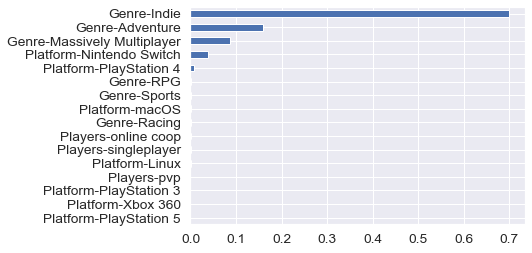

In [122]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

(pd.Series(rf.feature_importances_, index=x_train.columns)
   .nsmallest(30)
   .plot(kind='barh')) 


In [123]:
#Feature Importance
#model = LogisticRegression()
#model.fit(x_train, y_train)
# get importance
#importance = model.coef_[0]
# summarize feature importance
#for i,v in enumerate(importance):
#	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#pyplot.bar(x_train.columns, importance)
#pyplot.xticks(x_train.columns, rotation='vertical')
#pyplot.show()

Text(0.5, 0, 'Random Forest Feature Importance')

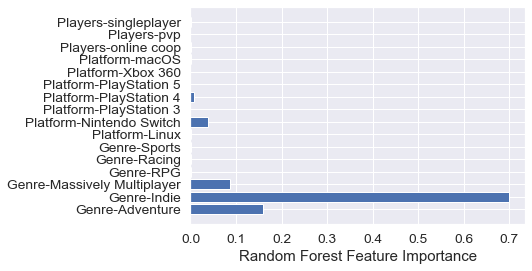

In [124]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

model = DecisionTreeRegressor()
# fit the model
model.fit(x_train, y_train)
model.feature_importances_
plt.barh(x_train.columns, rf.feature_importances_)
plt.xlabel("Random Forest Feature Importance")

In [125]:
from sklearn import metrics
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6998099625683847


In [126]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
fig = clf.fit(x_train,y_train)

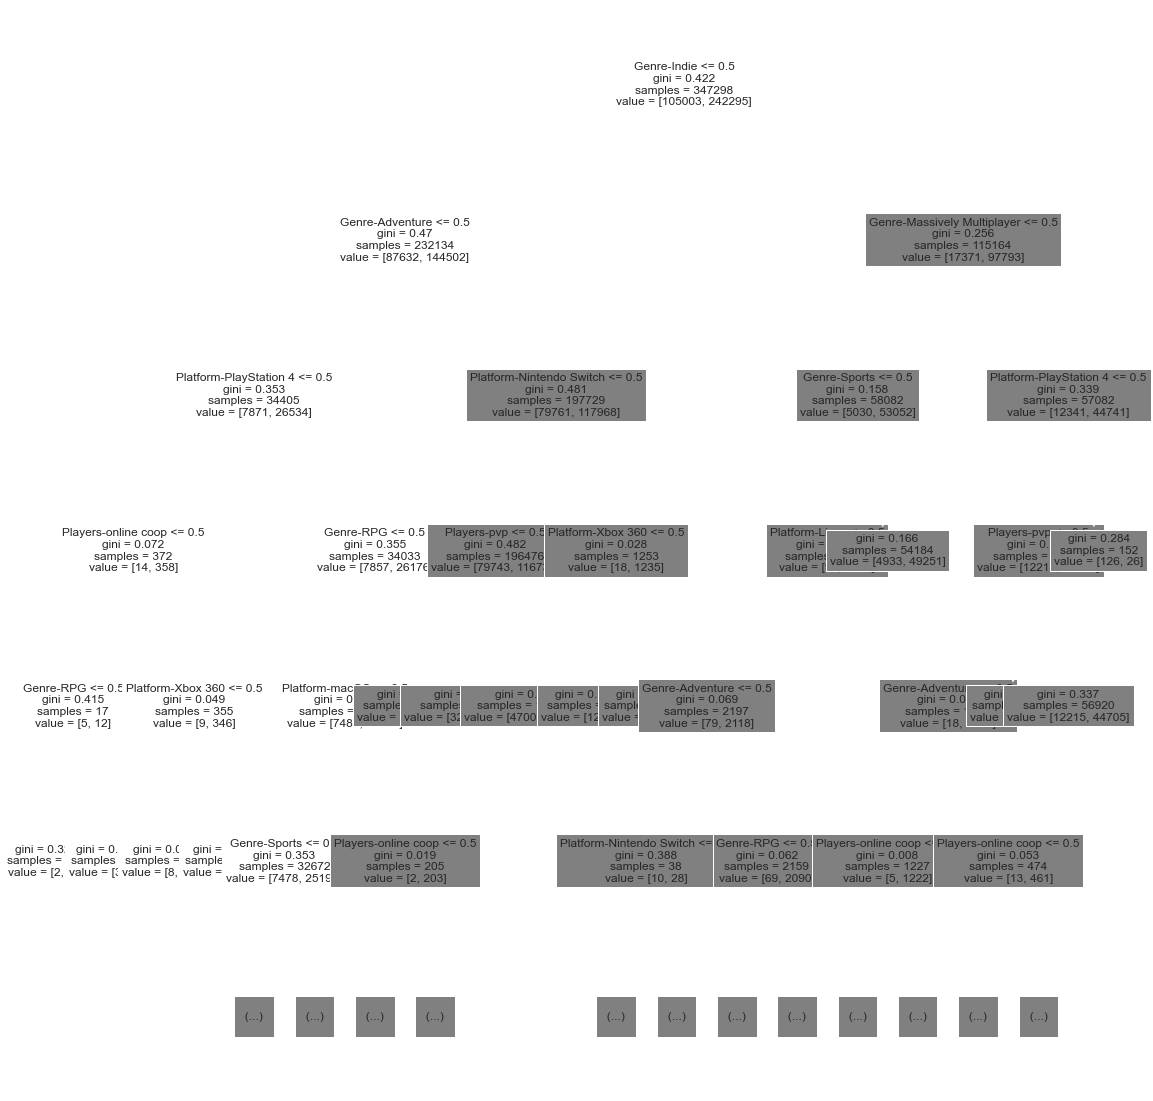

In [127]:
plt.figure(figsize=(20,20))
tree.plot_tree(fig, max_depth=5, fontsize=12, feature_names=x_train.columns)
plt.show()

Accuracy: 0.6998


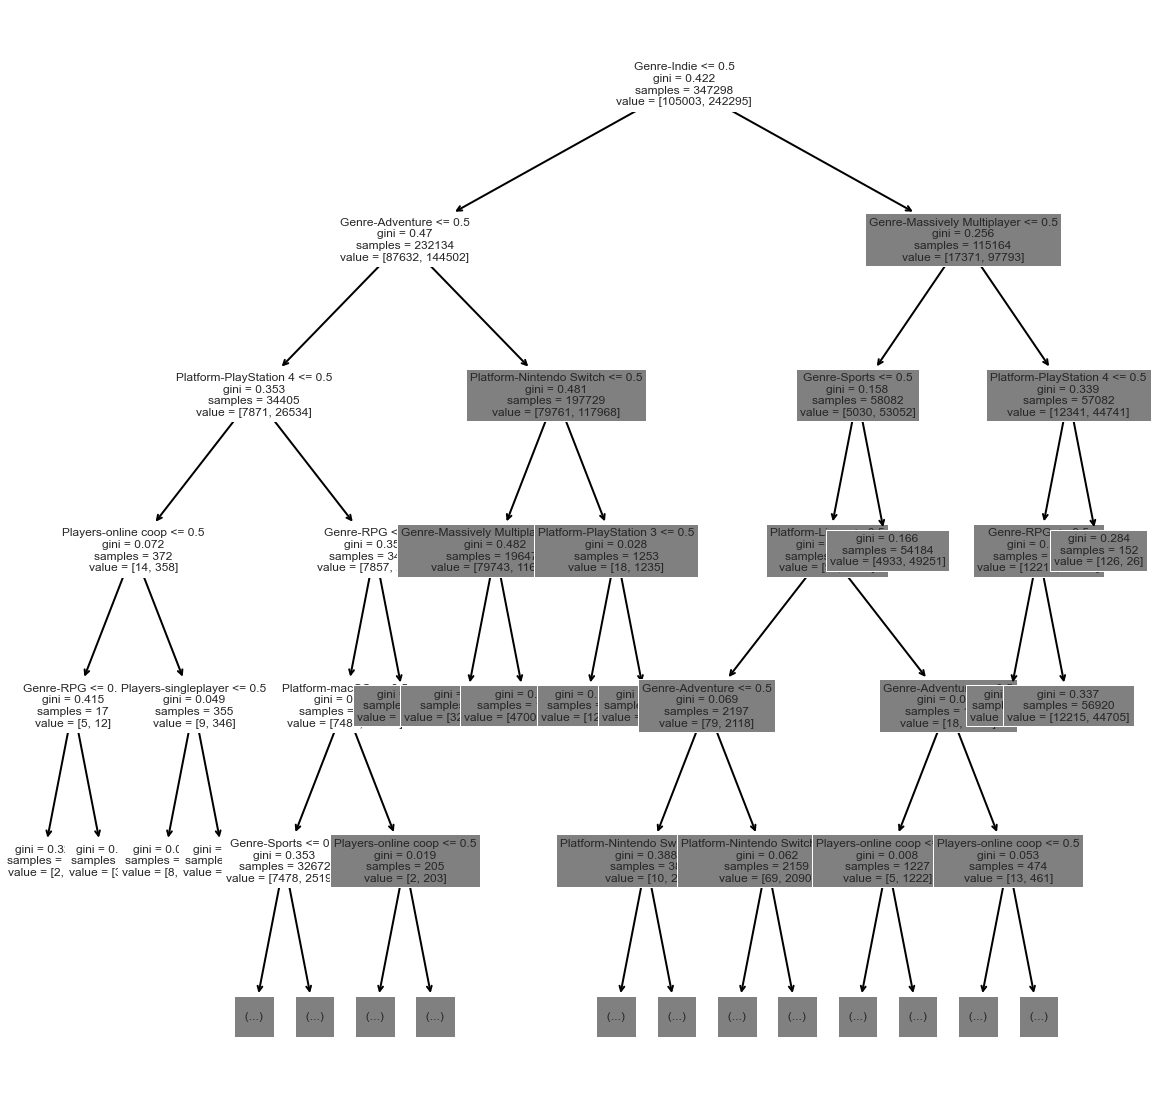

In [128]:
clf = clf.fit(x_train,y_train)
fig, ax = plt.subplots(figsize=(20,20))
out = tree.plot_tree(clf, max_depth=5, fontsize=12, feature_names=x_train.columns)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(2)
#Predict the response for test dataset
y_pred = clf.predict(x_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred), 4))

In [129]:
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred), 4))

Accuracy: 0.6998


In [130]:
X = x_train
y = y_train
# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

NameError: name 'iris' is not defined

<Figure size 1800x1440 with 0 Axes>